#**PHẦN I: PHÂN TÍCH GIÁ NHÀ TẠI CALIFORNIA**

# **Bước 1. Tiền xử lý dữ liệu**




## **1.1 Tải dữ liệu California Housing**



  * Thông tin thuộc tính:
    * *MedInc* thu nhập trung bình trong khối nhóm
    * *HouseAge* tuổi nhà trung bình trong nhóm khối
    * *AveRooms* số phòng trung bình trên mỗi hộ gia đình
    * *AveBedrms* số phòng ngủ trung bình trên mỗi hộ gia đình
    * *Population* dân số nhóm khối
    * *AveOccup* số thành viên trung bình trong mỗi hộ gia đình
    * *Latitude* khối nhóm vĩ độ
    * *Longitude* khối nhóm kinh độ


In [ ]:
# Tải dữ liệu California Housing
from sklearn.datasets import fetch_california_housing
import pandas as pd
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target

In [ ]:
data.shape

(20640, 9)

In [ ]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


*   **<h2> Nhận xét:<h2>**
    *   Dữ liệu đã được tải thành công.
    *   Sự khác biệt về thang đo là một dấu hiệu quan trọng, gợi ý mạnh mẽ rằng việc **chuẩn hóa (Scaling)** dữ liệu (ví dụ: `MinMaxScaler`, `StandardScaler`) sẽ **cần thiết** ở các bước sau, đặc biệt trước khi sử dụng các thuật toán nhạy cảm với khoảng cách hoặc tối ưu hóa dựa trên gradient.
    *   Việc tất cả các cột ban đầu là số giúp đơn giản hóa một số bước tiền xử lý, nhưng chất lượng dữ liệu (trùng lặp, thiếu, ngoại lai) cần được kiểm tra kỹ hơn.

*   **Tiếp theo:** Sau khi tải, bước kiểm tra chất lượng dữ liệu cơ bản và cần thiết là xem xét dữ liệu có bị **trùng lặp** hay **thiếu** hay không.

## **1.2 Làm sạch dữ liệu**

### 1.2.1 Xử lý giá trị trùng lắp

In [ ]:
# Kiểm tra dữ liệu trùng lặp
print("Số hàng bị trùng lắp:", data.duplicated().sum())

Số hàng bị trùng lắp: 0


*   **Nhận xét:**
    *   Kết quả rất tốt: không có bất kỳ hàng nào trong DataFrame bị trùng lặp hoàn toàn.
    *   Điều này có nghĩa là mỗi hàng đại diện cho một quan sát (khối điều tra dân số) duy nhất, giúp tiết kiệm một bước xử lý và tăng độ tin cậy của dữ liệu.

*   **Bước tiếp theo:** Đã xác nhận không có dữ liệu trùng lặp, bước kiểm tra chất lượng tiếp theo là xác định xem có **giá trị bị thiếu (NaN)** trong dữ liệu hay không.

### 1.2.2 Xử lý giá trị bị thiếu

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#thay thế '?' bằng NaN
data.replace('?', np.nan, inplace=True)

In [ ]:
missing_data = data.isnull()
missing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [ ]:
for col in missing_data.columns:
  print(f"{col}: ", missing_data[col].value_counts())
  print("\n")


MedInc:  MedInc
False    20640
Name: count, dtype: int64


HouseAge:  HouseAge
False    20640
Name: count, dtype: int64


AveRooms:  AveRooms
False    20640
Name: count, dtype: int64


AveBedrms:  AveBedrms
False    20640
Name: count, dtype: int64


Population:  Population
False    20640
Name: count, dtype: int64


AveOccup:  AveOccup
False    20640
Name: count, dtype: int64


Latitude:  Latitude
False    20640
Name: count, dtype: int64


Longitude:  Longitude
False    20640
Name: count, dtype: int64


PRICE:  PRICE
False    20640
Name: count, dtype: int64




*   **<h2>Nhận xét:<h2>**
    *   Kiểm tra toàn diện xác nhận rằng bộ dữ liệu *ban đầu* này **không chứa bất kỳ giá trị thiếu nào**.
    *   Đây là một thuận lợi lớn, giúp bỏ qua bước xử lý giá trị thiếu phức tạp (imputation) ở giai đoạn này.

*   **Bước tiếp theo:**
Khi dữ liệu không trùng lặp và không thiếu giá trị ban đầu, mối quan tâm lớn tiếp theo về chất lượng dữ liệu là sự hiện diện của các **giá trị ngoại lai (outliers)** – những điểm dữ liệu khác biệt đáng kể so với phần còn lại. Cách hiệu quả để phát hiện chúng là thông qua trực quan hóa phân phối, điển hình là sử dụng **biểu đồ hộp (Boxplot)**.


### 1.2.3 Loại bỏ ngoại lai

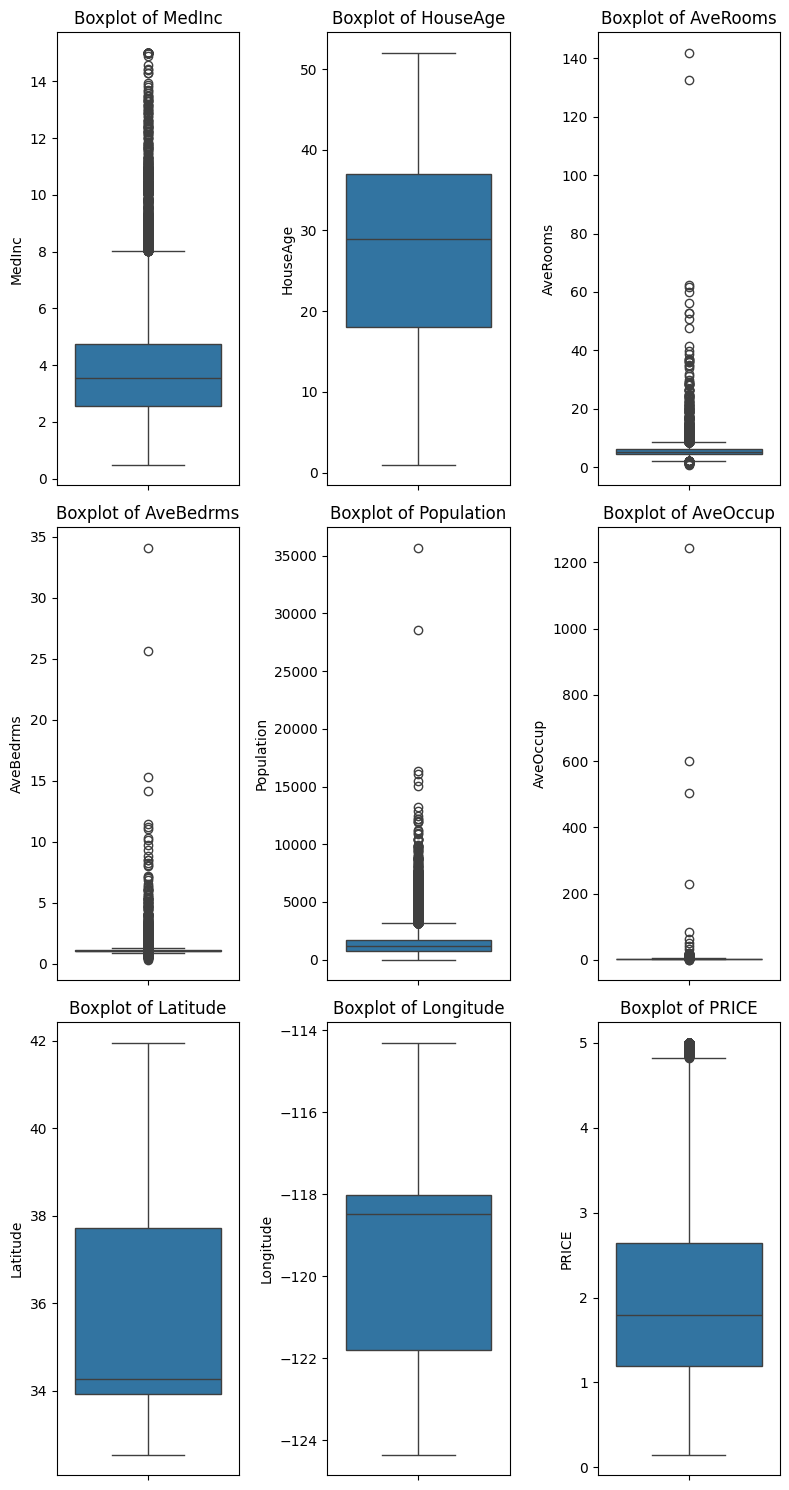

In [ ]:
cols = data.columns
plt.figure(figsize=(8, 15))
for i, col in enumerate(cols, 1):
    plt.subplot (3, 3, i)
    sns.boxplot(data=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**<h2>Insight từ các Subplots:</h2>**

1. **`MedInc` (Thu nhập trung bình):**
    *   Boxplot cho thấy rõ sự **lệch mạnh về bên phải**, với một số lượng đáng kể các điểm dữ liệu thể hiện mức thu nhập rất cao, tách biệt hẳn so với phần lớn các khu vực.
    *   Sự hiện diện của những giá trị cực đoan này có **nguy cơ làm sai lệch các phân tích và ảnh hưởng không cân xứng đến hiệu suất của các mô hình**, đặc biệt là các mô hình nhạy cảm với giá trị lớn như hồi quy tuyến tính.
    *   Điều này gợi ý sự cần thiết **phải điều chỉnh ảnh hưởng của chúng mà không loại bỏ hoàn toàn** thông tin về các khu vực giàu có.
2.  **`HouseAge` (Tuổi nhà trung bình):**
    *   Biến này cho thấy một sự phân bố khá cân đối, không có những điểm nằm quá xa so với cụm dữ liệu chính.
    *   Dựa trên hình ảnh trực quan này, **không có dấu hiệu rõ ràng về các giá trị ngoại lai cần can thiệp đặc biệt ở biến này.**

3.  **`AveRooms` & `AveBedrms` (Số phòng/phòng ngủ trung bình):**
    *   Cả hai biến này đều nổi bật với nhiều điểm dữ liệu có giá trị cực lớn, đôi khi đến mức khó tin (hàng chục, thậm chí hàng trăm phòng/hộ).
    *   Những giá trị này, dù có thể tồn tại trong một vài trường hợp đặc biệt, lại **nằm quá xa so với xu hướng chung và có khả năng gây nhiễu loạn đáng kể cho mô hình.**
    *   Sử dụng trực tiếp các giá trị này là không ổn, nhưng việc thay thế bằng một giá trị trung bình đơn giản cũng sẽ bỏ qua bản chất đa dạng của dữ liệu.
    *   **Cần một phương pháp ước tính giá trị thay thế dựa trên bối cảnh của các đặc điểm khác** trong cùng khu vực.

4.  **`Population` (Dân số):**
    *   Một số khu vực có quy mô dân số vượt trội hẳn so với phần còn lại, tạo thành các điểm dữ liệu biệt lập ở phía trên của boxplot.
    *   Mặc dù đây là thông tin thực, sự chênh lệch lớn về quy mô này có thể **khiến các mô hình bị chi phối bởi số ít các khu vực đông dân này**.
    *   Để mô hình có cái nhìn cân bằng hơn, cần **giảm nhẹ tác động của những giá trị đỉnh này**, có lẽ bằng cách thay thế chúng bằng một ước tính phù hợp hơn với các đặc tính khác.

5.  **`AveOccup` (Số người ở trung bình):**
    *   Đây là trường hợp các giá trị cực đoan thể hiện rõ nhất, với một số điểm cho thấy số người ở trung bình/hộ cao đến mức phi thực tế trong bối cảnh nhà ở thông thường.
    *   Điều này mạnh mẽ **gợi ý về sự tồn tại của sai số hoặc các loại hình cư trú rất đặc biệt** (không điển hình).
    *   Việc giữ nguyên các giá trị này gần như chắc chắn sẽ gây hại cho mô hình. Rõ ràng, cần một cách ước lượng thông minh hơn cho các trường hợp này, dựa vào mối liên hệ với các biến khác như số phòng, thu nhập,...

6.  **`Latitude` & `Longitude`:**
    *   Như mong đợi, các biến tọa độ địa lý có phân bố hẹp và không xuất hiện giá trị ngoại lai theo cách nhìn nhận thông thường qua boxplot.
    *   **Không cần xử lý thêm.**

7.  **`PRICE` (Giá nhà - Mục tiêu):**
    *   Biến mục tiêu cũng có các giá trị cao tách biệt. Tuy nhiên, việc điều chỉnh biến mà chúng ta cần dự đoán đòi hỏi sự cân nhắc kỹ lưỡng.
    *   **Thay đổi các giá trị nhà đắt tiền có thể vô tình làm mô hình mất khả năng dự đoán chính xác cho phân khúc thị trường này.**
    *   Do đó, dù nhận diện được các điểm này, chúng tôi sẽ **tạm thời giữ nguyên chúng** để đảm bảo mô hình được huấn luyện trên toàn bộ dải giá trị thực tế.

----

**<h2>Lựa chọn Chiến lược Xử lý Outlier: IQR -> NaN -> MICE</h2>**

Phân tích các biểu đồ boxplot cho thấy dữ liệu có vấn đề **outlier nghiêm trọng và phổ biến** ở nhiều biến dự báo quan trọng (`MedInc`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`). Những giá trị cực đoan này, đặc biệt là ở `AveRooms` và `AveOccup`, có nguy cơ làm sai lệch phân tích và ảnh hưởng tiêu cực đến các mô hình học máy.

Các phương pháp xử lý đơn giản tỏ ra **không phù hợp**:

*   **Loại bỏ hàng:** Sẽ làm mất quá nhiều dữ liệu do outlier xuất hiện ở nhiều cột.
*   **Capping (Giới hạn giá trị):** Tạo ra dữ liệu nhân tạo và phá vỡ mối quan hệ tự nhiên giữa các biến.
*   **Thay bằng Trung bình/Trung vị:** Quá đơn giản hóa, bỏ qua thông tin giá trị và mối liên hệ phức tạp giữa các biến trong bộ dữ liệu đa chiều này.

Do đó, một chiến lược **tinh vi hơn gồm hai bước** được lựa chọn:

1.  **Xác định bằng IQR và Đánh dấu bằng NaN:**
    *   Sử dụng phương pháp **IQR (Interquartile Range)** để xác định ngưỡng outlier một cách nhất quán và *robust* (ít bị ảnh hưởng bởi chính outlier), đặc biệt hiệu quả với dữ liệu lệch.
    *   **Tạm thời đánh dấu** các outlier này bằng giá trị **`NaN`**. Bước trung gian này giúp linh hoạt tách biệt việc "nhận diện" và "xử lý", đồng thời cho phép tận dụng các công cụ xử lý giá trị thiếu mạnh mẽ.

2.  **Điền giá trị bằng MICE (Multivariate Imputation by Chained Equations):**
    *   Sử dụng **`MICE`**, một thuật toán imputation **đa biến**, để ước tính và thay thế các giá trị `NaN`.
    *   **Ưu điểm chính:** `MICE` xem xét **mối quan hệ giữa tất cả các biến** khi dự đoán giá trị thay thế. Điều này giúp **bảo toàn cấu trúc tương quan tự nhiên** của dữ liệu tốt hơn nhiều so với các phương pháp đơn biến, tạo ra một bộ dữ liệu hoàn chỉnh, nhất quán và phản ánh thực tế tốt hơn. Nó cũng giúp giảm thiểu thiên vị so với việc loại bỏ hoặc capping.

**Tóm lại:** Chiến lược **IQR -> NaN -> MICE** được chọn vì nó giải quyết hiệu quả vấn đề outlier phổ biến trong dữ liệu đa biến này bằng cách:

* (1) sử dụng một phương pháp nhận diện robust (là phương pháp hoặc thước đo đó không bị ảnh hưởng quá nhiều bởi các giá trị ngoại lai (outliers) hoặc bởi những sai lệch nhỏ so với các giả định lý tưởng) ,
* và (2) áp dụng một kỹ thuật imputation thông minh, dựa trên ngữ cảnh đa biến để thay thế outlier, nhằm bảo toàn tối đa thông tin và cấu trúc dữ liệu cho các bước mô hình hóa tiếp theo.

In [ ]:
from sklearn.experimental import enable_iterative_imputer # Cần thiết để import IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# === 1. Xác định và thay thế Outliers bằng NaN dùng IQR ===

cols_to_check = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
print(f"Các cột sẽ được kiểm tra và xử lý outliers: {cols_to_check}")

data_processed = data.copy() # Tạo bản sao để xử lý, giữ lại data gốc nếu cần

# Lưu trữ số lượng outliers tìm thấy cho mỗi cột
outliers_count = {}

# Hàm Thay thế outliers trong cột được chỉ định bằng NaN sử dụng phương pháp IQR
def replace_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR_val = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR_val
    upper_bound = Q3 + 1.5 * IQR_val

    # Xác định outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers) # Đếm số lượng outliers

    # Thay thế outliers bằng NaN
    df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
    return df

# Áp dụng hàm cho các cột đã chọn
for col in cols_to_check:
    data_processed = replace_outliers_iqr(data_processed, col)

print("\nSố lượng outliers được phát hiện và thay thế bằng NaN (theo IQR):")
for col, count in outliers_count.items():
    print(f"- {col}: {count}")

print("\nKiểm tra missing values sau khi thay thế outliers bằng NaN:")
print(data_processed.isnull().sum())

Các cột sẽ được kiểm tra và xử lý outliers: ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

Số lượng outliers được phát hiện và thay thế bằng NaN (theo IQR):
- MedInc: 681
- AveRooms: 511
- AveBedrms: 1424
- Population: 1196
- AveOccup: 711

Kiểm tra missing values sau khi thay thế outliers bằng NaN:
MedInc         681
HouseAge         0
AveRooms       511
AveBedrms     1424
Population    1196
AveOccup       711
Latitude         0
Longitude        0
PRICE            0
dtype: int64


In [ ]:
# === 2. Sử dụng MICE để điền giá trị thiếu (NaN từ outliers) ===

# MICE thường hoạt động tốt hơn với dữ liệu đã được scale
# Lưu lại tên cột và index gốc
original_columns = data_processed.columns
original_index = data_processed.index

# Chỉ scale các cột số (MICE yêu cầu đầu vào là số)
numeric_cols = data_processed.select_dtypes(include=np.number).columns
data_numeric = data_processed[numeric_cols]

# Bước 1: Scale dữ liệu về khoảng [0, 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)
data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_cols, index=original_index) # Tạo lại DF để dễ xem NaN

print(f"\nSố lượng NaN trước khi chạy MICE (trên dữ liệu đã scale): {data_scaled_df.isnull().sum().sum()}")

# Bước 2: Áp dụng MICE (IterativeImputer)
mice_imputer = IterativeImputer(max_iter=10, random_state=0, tol=1e-3)

# Fit và transform trên dữ liệu đã scale
data_imputed_scaled = mice_imputer.fit_transform(data_scaled_df)

# Bước 3: Inverse scale để đưa dữ liệu về thang đo gốc
data_imputed_original_scale = scaler.inverse_transform(data_imputed_scaled)

# Bước 4: Tạo lại DataFrame hoàn chỉnh với dữ liệu đã được điền và về thang đo gốc
data_final = pd.DataFrame(data_imputed_original_scale, columns=numeric_cols, index=original_index)

print("\nKiểm tra missing values sau khi chạy MICE:")
print(data_final.isnull().sum()) # Output nên là 0 hết

print("\n5 dòng đầu của dữ liệu sau khi xử lý outliers và điền MICE:")
print(data_final.head())

print("\nShape dữ liệu sau xử lý:", data_final.shape)


Số lượng NaN trước khi chạy MICE (trên dữ liệu đã scale): 4523

Kiểm tra missing values sau khi chạy MICE:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

5 dòng đầu của dữ liệu sau khi xử lý outliers và điền MICE:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  6.493762      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  6.045277      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.257400      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.643100      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.846200      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Shape dữ liệu sau xử lý: (20640, 9)


### 1.2.4 Chuyển các biến định tính về dạng số

In [ ]:
data_final.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
PRICE,float64



*   **<h2> Nhận xét:<h2>**
    *   Kết quả xác nhận rằng tất cả dữ liệu đều ở định dạng số thực, phù hợp cho hầu hết các thuật toán học máy và phân tích số lượng.
    *   Không cần thực hiện thêm bước mã hóa biến định tính (categorical encoding).

*   **Bước tiếp theo:** Dữ liệu đã sẵn sàng về mặt định dạng. Bước quan trọng tiếp theo là **đánh giá tác động** của việc xử lý outlier lên **phân phối của từng biến**. Điều này được thực hiện tốt nhất bằng cách vẽ **biểu đồ phân phối (Histogram)** cho dữ liệu `data_final`.

# **Bước 2. Khám phá dữ liệu và trực quan hóa**



## 2.1 Vẽ biểu đồ phân phối, scatter plot để phân tích mối quan hệ giữa các biến


### 2.1.1 Biểu đồ phân phối

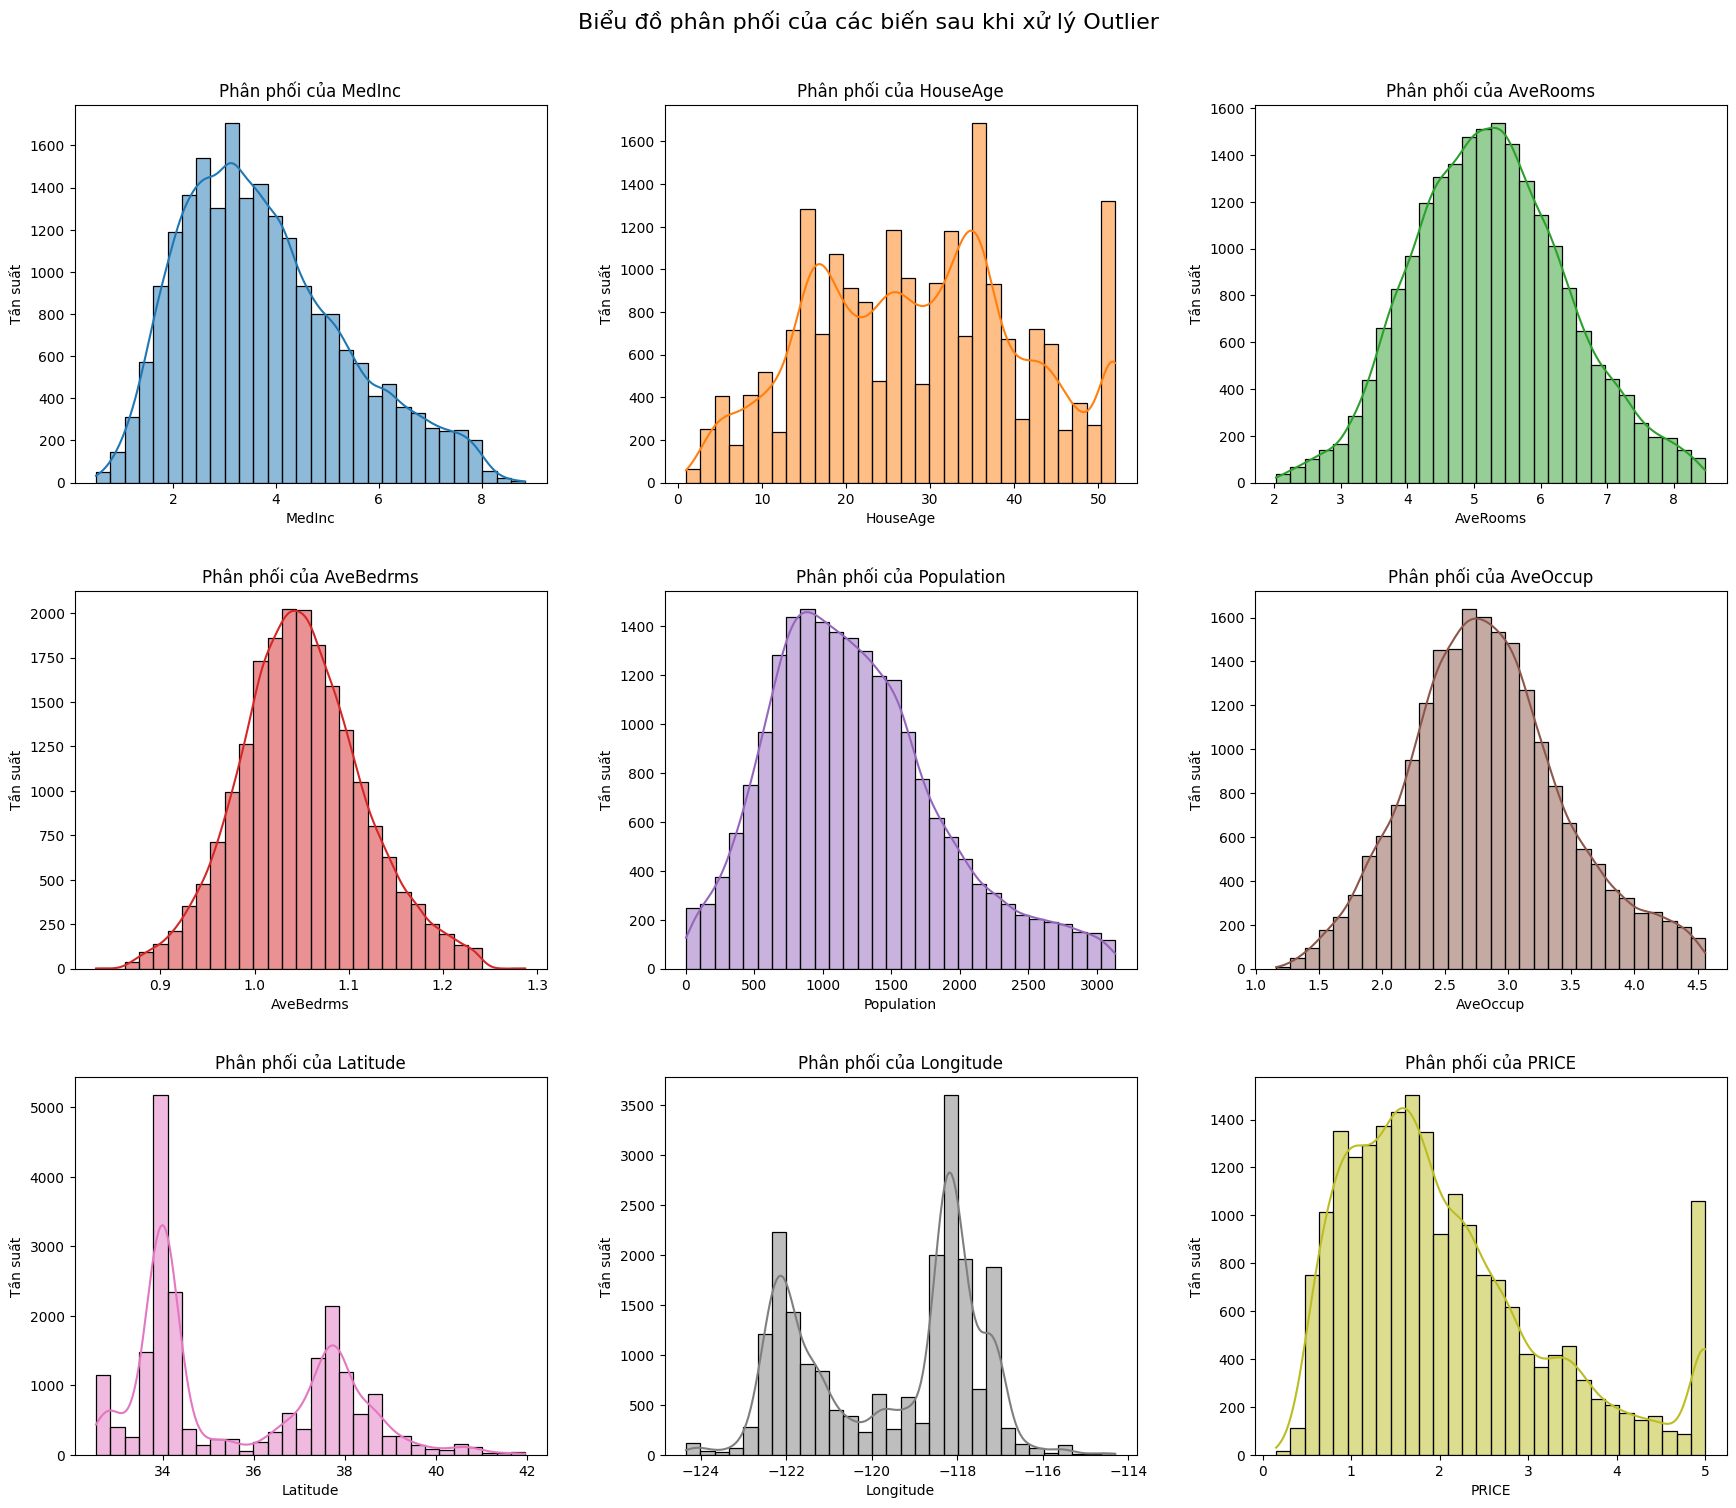

In [ ]:
# Lấy danh sách các cột
columns = data_final.columns
num_columns = len(columns)
# Tính số hàng cần thiết cho subplot (3 cột mỗi hàng)
num_rows = (num_columns + 2) // 3

# Tạo một bảng màu với đủ màu cho mỗi biểu đồ
palette = sns.color_palette("tab10", num_columns)

# Vẽ biểu đồ
plt.figure(figsize=(18, num_rows * 5)) # Tăng kích thước để dễ nhìn hơn
for i, column in enumerate(columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data_final[column], kde=True, bins=30, color=palette[i])
    plt.title(f'Phân phối của {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Tần suất', fontsize=10)
plt.tight_layout(pad=3.0) # Thêm khoảng cách giữa các plot
plt.suptitle('Biểu đồ phân phối của các biến sau khi xử lý Outlier', y=1.02, fontsize=16)
plt.show()


**<h2> Insight: Đánh giá Hiệu quả Xử lý Outlier (IQR-MICE)<h2>**

- **Hiệu quả xử lý Outlier:**
    *   Các biến như `` `AveRooms` ``, `` `AveBedrms` ``, và `` `AveOccup` `` có phân phối trông **"gọn gàng" và đối xứng hơn đáng kể** so với trước khi xử lý.
    *   Các đuôi dài chứa giá trị cực đoan đã được **giảm thiểu rõ rệt**. Điều này cho thấy phương pháp IQR-MICE đã **thành công** trong việc thay thế các giá trị rất lớn/bất thường bằng các ước tính hợp lý hơn, tạo ra các phân phối gần với dạng chuông hơn.
- **Đặc tính dữ liệu gốc được bảo toàn:**
    *   **`MedInc`**: Vẫn giữ được **độ lệch phải tự nhiên** đặc trưng của dữ liệu thu nhập (đa số có thu nhập trung bình/thấp, số ít có thu nhập rất cao).
    *   **`HouseAge`**: Cho thấy sự **tập trung ở một số khoảng tuổi nhất định**, có thể phản ánh các giai đoạn xây dựng chính hoặc giới hạn tuổi trong dữ liệu gốc (với đỉnh đáng chú ý ở khoảng 52 tuổi).
    *   **`Population`**: Vẫn **lệch phải**, thể hiện đặc điểm nhiều khu vực có dân số thấp/trung bình.
    *   **`Latitude` & `Longitude`**: Các đỉnh trong phân phối vẫn thể hiện rõ các **cụm dân cư chính** tại California.
    *   **`PRICE`**: Vẫn **lệch phải** và duy trì **đỉnh rõ ràng ở giá trị 5** (tương ứng $500,000), xác nhận rằng giới hạn trên của biến mục tiêu không bị thay đổi (phù hợp với quyết định không xử lý outlier cho `PRICE`).

**Kết luận:** Quá trình xử lý outlier bằng IQR-MICE đã **cải thiện đáng kể** hình dạng phân phối của các biến bị ảnh hưởng nặng bởi giá trị cực đoan, đồng thời **bảo toàn thành công** các đặc điểm phân phối quan trọng và tự nhiên của dữ liệu gốc.

### 2.1.2 Scatter Plot

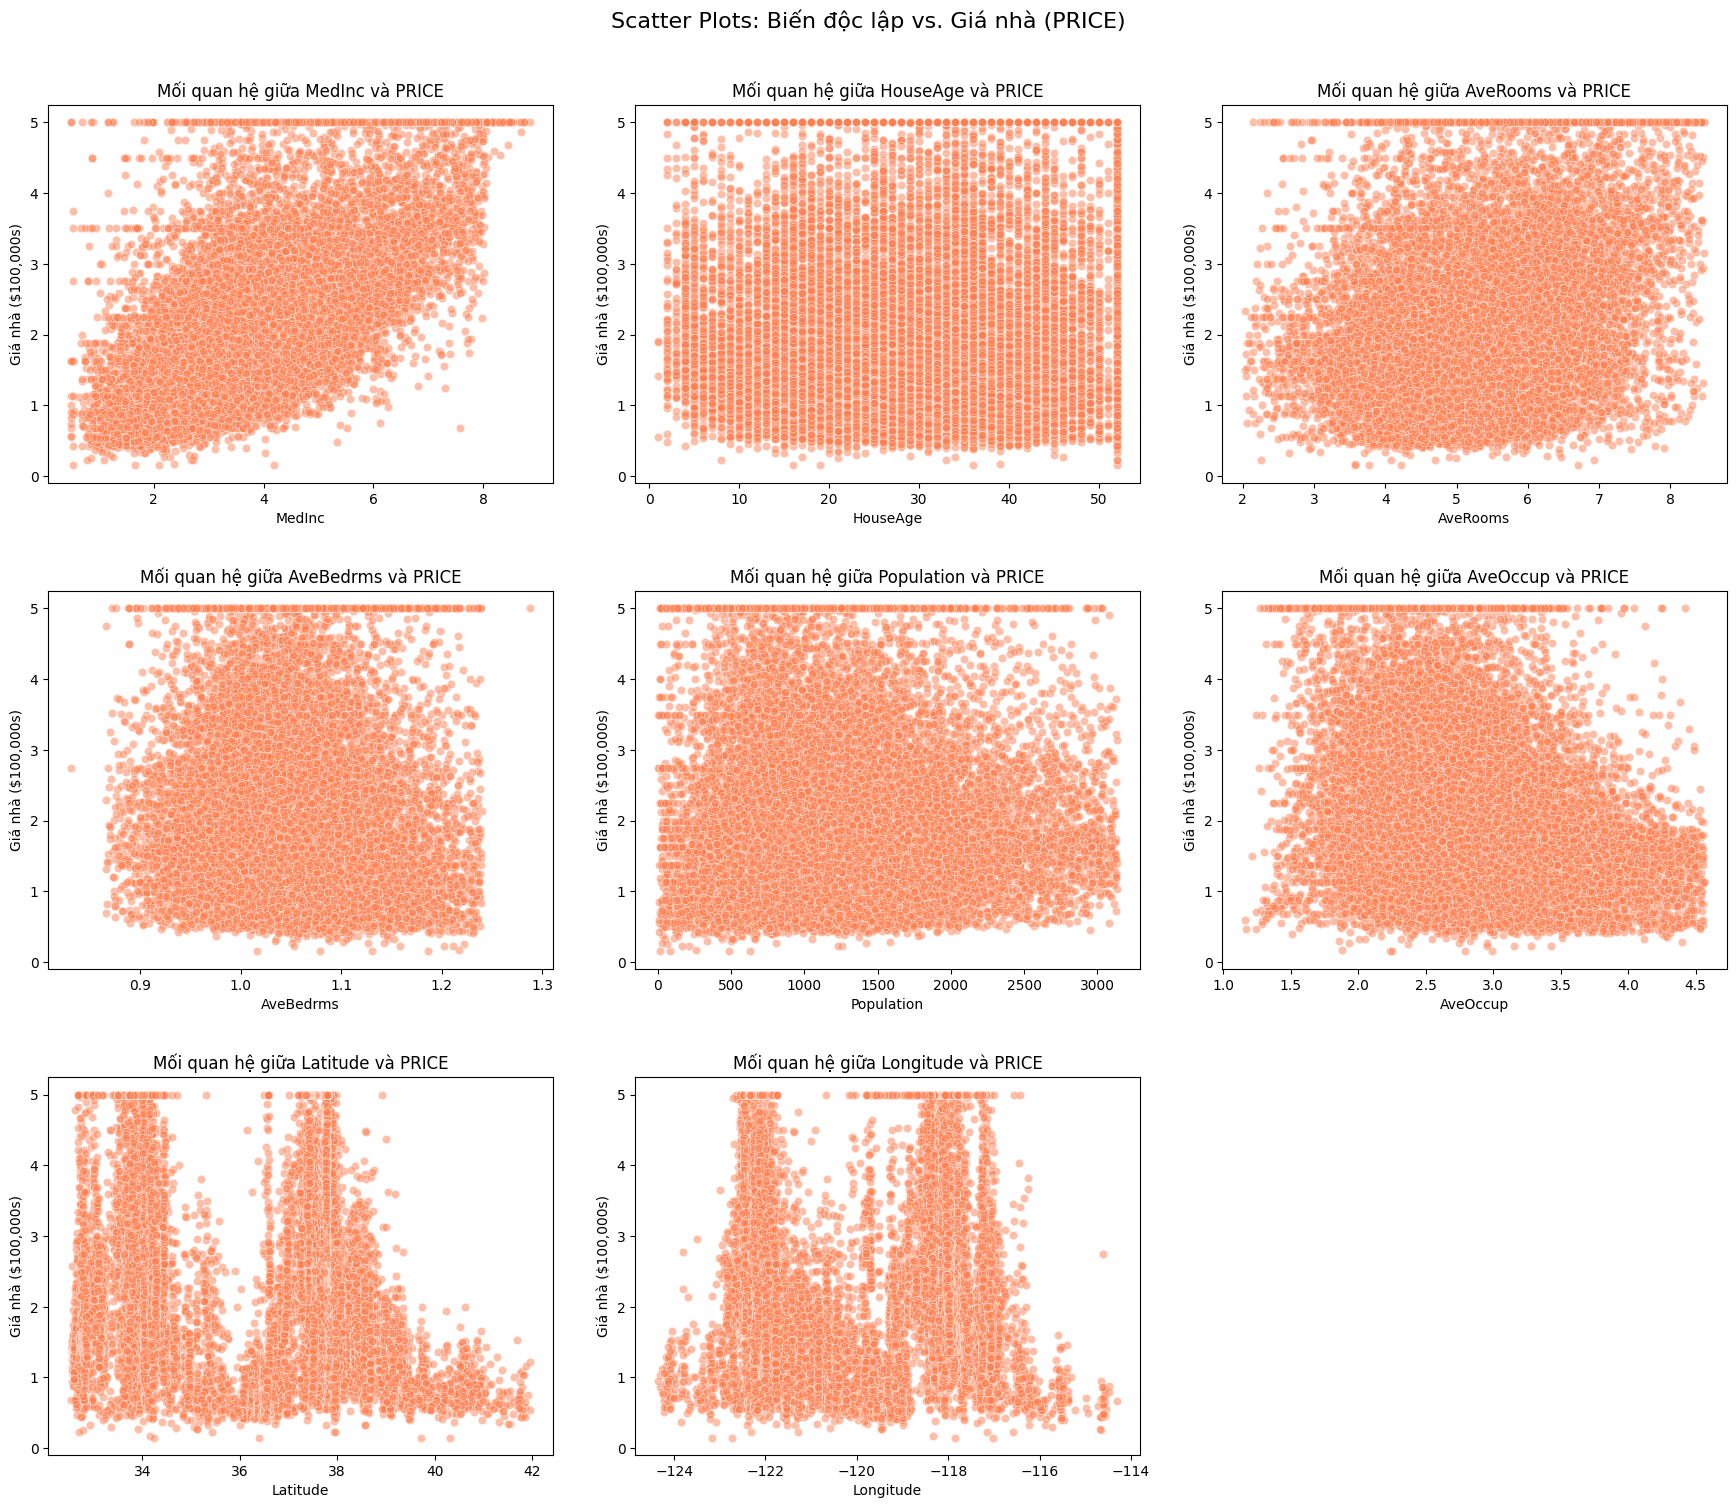

In [ ]:
features = data_final.drop('PRICE', axis=1).columns
num_features = len(features)
num_rows_scatter = (num_features + 2) // 3

plt.figure(figsize=(18, num_rows_scatter * 5))
for i, feature in enumerate(features):
    plt.subplot(num_rows_scatter, 3, i + 1)
    # Sử dụng alpha để nhìn rõ hơn ở những vùng dày đặc điểm
    sns.scatterplot(data=data_final, x=feature, y='PRICE', alpha=0.5, color='coral')
    plt.title(f'Mối quan hệ giữa {feature} và PRICE', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Giá nhà ($100,000s)', fontsize=10)
plt.tight_layout(pad=3.0)
plt.suptitle('Scatter Plots: Biến độc lập vs. Giá nhà (PRICE)', y=1.02, fontsize=16)
plt.show()

**<h2> Insight: <h2>**

- **Mối quan hệ với Giá nhà (`PRICE`):**
  - **`MedInc` là yếu tố chi phối:**
    *   Cả **scatter plot** và **heatmap** (hệ số tương quan ≈ `0.68`) đều xác nhận `MedInc` có **mối quan hệ đồng biến (tuyến tính) mạnh nhất** với `PRICE`.
    *   Rõ ràng, khi thu nhập trung bình tăng, giá nhà có xu hướng tăng theo một cách khá tuyến tính.
  - **`AveRooms` có ảnh hưởng đáng kể:**
    *   Scatter plot cho thấy xu hướng đồng biến yếu, nhưng heatmap lại chỉ ra một mối **tương quan dương khá đáng kể** (≈ `0.33`).
    *   Điều này có nghĩa là, xét về mặt tuyến tính, số phòng trung bình nhiều hơn *có liên quan* đến giá nhà cao hơn, dù mối quan hệ này không chặt chẽ và rõ ràng như của thu nhập.
  - **Ảnh hưởng yếu từ các biến khác:**
    *   Các biến như `HouseAge`, `AveBedrms`, `Population`, `AveOccup` cho thấy **mối quan hệ tuyến tính rất yếu hoặc không rõ ràng** với `PRICE`.
    *   Điều này được khẳng định trên cả scatter plot (phân tán, không có xu hướng rõ) và heatmap (hệ số tương quan **gần 0**).
  - **Vị trí địa lý quan trọng (ngoài tương quan tuyến tính):**
    *   Mặc dù tương quan tuyến tính của `Latitude` và `Longitude` với `PRICE` thấp, **scatter plot lại cho thấy rõ các cụm giá nhà khác nhau tùy theo vị trí địa lý** (ví dụ, các điểm giá cao tập trung ở một số vĩ độ/kinh độ nhất định).
    *   Điều này mạnh mẽ gợi ý sự tồn tại của **mối quan hệ phi tuyến** hoặc các tương tác phức tạp liên quan đến vị trí, vốn không được thể hiện đầy đủ qua hệ số tương quan tuyến tính đơn thuần.

**Kết luận:** Thu nhập (`MedInc`) là yếu tố dự báo tuyến tính mạnh nhất cho giá nhà. Số phòng (`AveRooms`) cũng có vai trò, nhưng yếu hơn. Các yếu tố khác có ảnh hưởng tuyến tính không đáng kể. Tuy nhiên, **vị trí địa lý đóng vai trò quan trọng theo cách phi tuyến tính**, cần được xem xét kỹ hơn trong các bước mô hình hóa (ví dụ: qua feature engineering hoặc các mô hình có khả năng bắt các tương tác không gian).



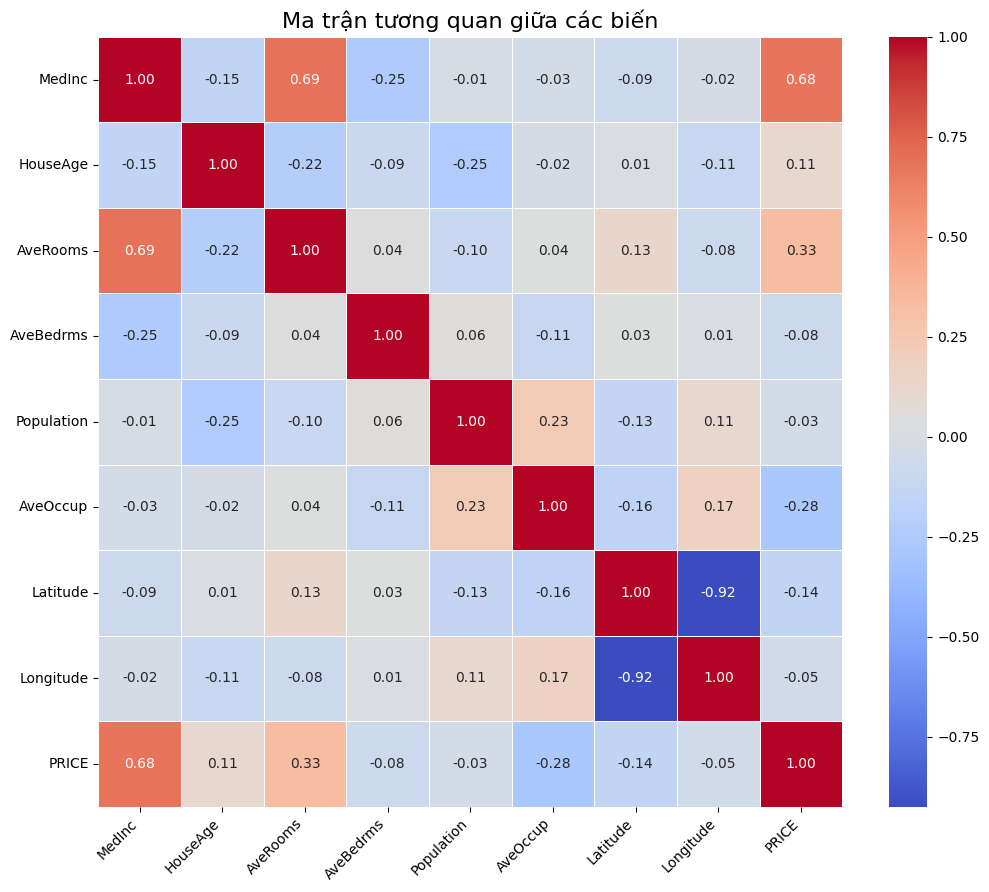

In [ ]:
# Heatmap ma trận tương quan
plt.figure(figsize=(12, 10))
correlation_matrix = data_final.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Ma trận tương quan giữa các biến', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

**<h2> Insight: Tương quan giữa các Biến Độc lập & Đa cộng tuyến Tiềm ẩn<h2>**

**1. Dấu hiệu Đa cộng tuyến mạnh:**

*   **`Latitude` vs. `Longitude`:**
    *   Nổi bật nhất là hệ số tương quan **`r ≈ -0.92`** giữa `Latitude` và `Longitude`.
    *   Đây là một mối **tương quan nghịch biến cực kỳ mạnh mẽ**, phản ánh đúng hình dạng địa lý của California.
    *   Mối tương quan chặt chẽ này là **dấu hiệu rõ ràng của đa cộng tuyến nghiêm trọng** giữa hai biến vị trí. Chúng cung cấp thông tin rất giống nhau (hoặc đối nghịch nhau một cách có hệ thống).

*   **`MedInc` vs. `AveRooms`:**
    *   Heatmap cũng cho thấy một mối **tương quan dương mạnh** giữa `MedInc` và `AveRooms` (hệ số tương quan **`≈ 0.69`**).
    *   Điều này hợp lý về mặt logic (khu vực thu nhập cao hơn thường có nhà lớn hơn), nhưng cũng là một dấu hiệu mạnh mẽ về **hiện tượng đa cộng tuyến tiềm ẩn** giữa hai biến này.

*   **Các tương quan khác:**
    *   Các mối tương quan khác giữa các biến độc lập nhìn chung là **yếu hoặc trung bình**, ít gây lo ngại hơn về đa cộng tuyến nghiêm trọng tại thời điểm này.

---

**<h2>Vậy chúng ta rút kết được gì từ insight trên? <h2>**

Sự tồn tại của **ít nhất hai cặp biến có đa cộng tuyến cao** (`Latitude`/`Longitude` và `MedInc`/`AveRooms`) cần được **đặc biệt chú ý** trong bước xây dựng mô hình, đặc biệt là các mô hình hồi quy tuyến tính:

1.  **Rủi ro:**
    *   Đa cộng tuyến cao có thể dẫn đến các **ước lượng hệ số hồi quy không ổn định** (thay đổi lớn với những thay đổi nhỏ trong dữ liệu).
    *   Việc **diễn giải ý nghĩa độc lập của từng biến** trở nên khó khăn và kém tin cậy.

2.  **Giải pháp tiềm năng:**
    *   **Kiểm tra kỹ hơn:** Sử dụng **Hệ số Phóng đại Phương sai (VIF - Variance Inflation Factor)** để định lượng mức độ đa cộng tuyến cho từng biến.
    *   **Kỹ thuật Chính quy hóa:** Áp dụng các mô hình như **Ridge Regression** hoặc **Lasso Regression**, vốn có khả năng xử lý đa cộng tuyến bằng cách "co lại" các hệ số.
    *   **Lựa chọn/Loại bỏ biến:** Cân nhắc loại bỏ một trong hai biến có tương quan rất cao (ví dụ: chỉ giữ lại `Latitude` hoặc `Longitude`, tùy thuộc vào VIF hoặc kiểm định khác).
    *   **Tạo Biến mới (Feature Engineering):** Kết hợp thông tin từ các biến tương quan cao. Ví dụ, tạo biến mới dựa trên `Latitude` và `Longitude` như "khoảng cách đến bờ biển" hoặc "khoảng cách đến trung tâm thành phố lớn".

**Kết luận:** Vấn đề đa cộng tuyến tiềm ẩn là một yếu tố quan trọng cần được giải quyết trong các bước tiếp theo để đảm bảo xây dựng được mô hình hồi quy ổn định và có khả năng diễn giải tốt.

## 2.2 Áp dụng PCA với 2 thành phần chính

In [ ]:
# Import các thư viện cần thiết
from sklearn.preprocessing import StandardScaler # Dùng để chuẩn hóa cho PCA
from sklearn.decomposition import PCA # Thư viện PCA

In [ ]:
# Tách features (X) và target (y)
X = data_final.drop('PRICE', axis=1)
y = data_final['PRICE']
feature_names = X.columns # Lưu lại tên các feature

# --- Bước 1: Chuẩn hóa dữ liệu features ---
# PCA rất nhạy cảm với độ lớn của các biến, nên cần chuẩn hóa.
print("   - Chuẩn hóa dữ liệu features (StandardScaler)...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

# --- Bước 2: Áp dụng PCA ---
print("   - Áp dụng PCA để giảm xuống 2 thành phần chính...")
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Tạo DataFrame mới chứa kết quả PCA
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Thêm lại biến mục tiêu 'PRICE' vào pca_df để tô màu
# Đảm bảo index khớp nếu data_final có index không chuẩn (reset_index nếu cần)
pca_df['PRICE'] = y.reset_index(drop=True)

# --- Bước 3: Đánh giá và Trực quan hóa PCA ---
# Xem tỷ lệ phương sai được giải thích
explained_variance_ratio = pca.explained_variance_ratio_
print(f"\n   - Tỷ lệ phương sai giải thích bởi PC1: {explained_variance_ratio[0]:.4f} ({explained_variance_ratio[0]*100:.2f}%)")
print(f"   - Tỷ lệ phương sai giải thích bởi PC2: {explained_variance_ratio[1]:.4f} ({explained_variance_ratio[1]*100:.2f}%)")
print(f"   - Tổng tỷ lệ phương sai giải thích bởi 2 PCs: {explained_variance_ratio.sum():.4f} ({explained_variance_ratio.sum()*100:.2f}%)")



   - Chuẩn hóa dữ liệu features (StandardScaler)...
   - Áp dụng PCA để giảm xuống 2 thành phần chính...

   - Tỷ lệ phương sai giải thích bởi PC1: 0.2581 (25.81%)
   - Tỷ lệ phương sai giải thích bởi PC2: 0.2244 (22.44%)
   - Tổng tỷ lệ phương sai giải thích bởi 2 PCs: 0.4824 (48.24%)


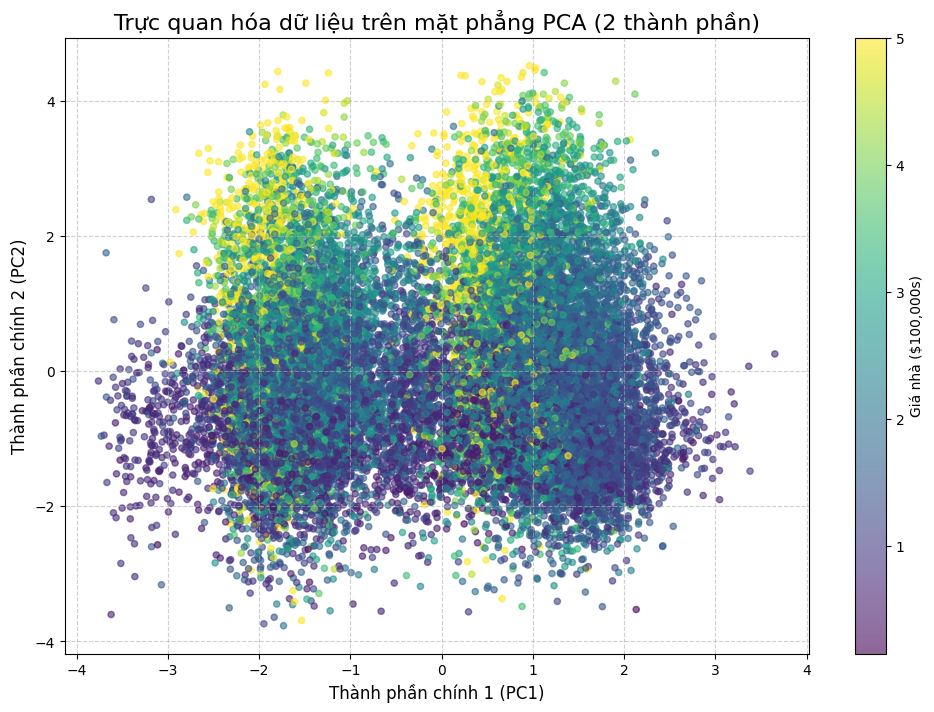

In [ ]:
# Trực quan hóa kết quả PCA trên mặt phẳng 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['PRICE'],
                      cmap='viridis', # Chọn bảng màu phù hợp
                      alpha=0.6,      # Điều chỉnh độ trong suốt
                      s=20)           # Kích thước điểm
plt.xlabel('Thành phần chính 1 (PC1)', fontsize=12)
plt.ylabel('Thành phần chính 2 (PC2)', fontsize=12)
plt.title('Trực quan hóa dữ liệu trên mặt phẳng PCA (2 thành phần)', fontsize=16)
plt.colorbar(scatter, label='Giá nhà ($100,000s)') # Thêm thanh màu chú giải
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**<h2> Insight từ Phân tích Thành phần Chính (PCA) <h2>**

**Tính Đa chiều cao & Phương sai giải thích:**

*   Hai thành phần chính đầu tiên (`PC1` và `PC2`) chỉ giải thích được **`48.24%`** tổng phương sai của các biến độc lập.
*   **Con số này tương đối thấp,** cho thấy sự biến động trong dữ liệu **không tập trung chủ yếu vào chỉ 2 chiều**. Để nắm bắt phần lớn thông tin của dữ liệu gốc, cần sử dụng nhiều hơn 2 thành phần chính.

**Hạn chế của Trực quan hóa 2D:**

*   Do tỷ lệ phương sai giải thích thấp, biểu đồ scatter plot 2D (`PC1` vs `PC2`) sẽ **không thể hiện đầy đủ cấu trúc phức tạp** và các mối quan hệ tinh vi trong dữ liệu 8 chiều gốc.
*   Kết quả trực quan dự kiến: Các điểm dữ liệu có khả năng **trông giống như một đám mây dày đặc, ít cấu trúc rõ ràng, các điểm trộn lẫn vào nhau.**

**Khó phân tách theo giá trong không gian 2D:**

*   Màu sắc của các điểm (đại diện cho `PRICE`) trên biểu đồ PCA 2D **khả năng cao sẽ không phân tách thành các vùng riêng biệt, rõ ràng.**
*   Các mức giá khác nhau sẽ nằm xen kẽ, cho thấy rằng 2 chiều phương sai lớn nhất này **không đủ mạnh để phân tách hiệu quả các nhóm giá nhà khác nhau**.
*   Điều này củng cố nhận định rằng mối quan hệ giữa các đặc điểm và giá nhà là phức tạp và nằm trong các chiều không gian cao hơn (được biểu diễn bởi `PC3`, `PC4`,...).


**Kết luận:** PCA cho thấy dữ liệu có tính đa chiều cao và việc giảm xuống chỉ còn 2 chiều làm mất đi một lượng đáng kể thông tin. Do đó, biểu đồ PCA 2D khó có thể phân tách rõ ràng các nhóm giá nhà, gợi ý sự cần thiết phải xem xét nhiều chiều hơn hoặc sử dụng các kỹ thuật khác để hiểu rõ hơn mối quan hệ giữa các đặc trưng và giá.

# **Bước 3. Xây dựng mô hình hồi quy tuyến tính đa biến để dự đoán giá nhà**


## 3.1 Xây dựng mô hình đơn giản từ tất cả các biến

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # Quan trọng cho CV với scaling
import statsmodels.api as sm # Dùng cho OLS và VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats # Dùng cho Shapiro-Wilk và Q-Q plot

In [ ]:
# 1. Tách Features (X) và Target (y)
from sklearn.preprocessing import StandardScaler
X = data_final.drop(columns='PRICE')
y = data_final['PRICE']

# 2. Chuẩn hóa Features (X) bằng StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names) # Chuyển về DataFrame nếu muốn xem

# 3. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42 # random_state để kết quả lặp lại được
)
print(f"Kích thước tập huấn luyện: X={X_train.shape}, y={y_train.shape}")
print(f"Kích thước tập kiểm tra: X={X_test.shape}, y={y_test.shape}")

# 4. Khởi tạo và huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("\nĐã huấn luyện mô hình Linear Regression.")

# 5. Dự đoán trên tập kiểm tra (đã chuẩn hóa)
y_pred = lr_model.predict(X_test)

# 6. Đánh giá mô hình
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) #

print("\n--- Kết quả đánh giá mô hình trên tập Test ---")
print(f"R-squared (R2):           {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Kích thước tập huấn luyện: X=(16512, 8), y=(16512,)
Kích thước tập kiểm tra: X=(4128, 8), y=(4128,)

Đã huấn luyện mô hình Linear Regression.

--- Kết quả đánh giá mô hình trên tập Test ---
R-squared (R2):           0.6431
Mean Absolute Error (MAE): 0.5115
Root Mean Squared Error (RMSE): 0.6839


**<H2> Nhận xét: Đánh giá mô hình hồi quy tuyến tính (Baseline)<h2>**

**Kết quả Đánh giá trên Tập Test:**

*   **`R-squared (R2): 0.6431`**
    *   **Khá tốt:** Mô hình giải thích được khoảng **64.31%** sự biến thiên của giá nhà (`PRICE`). Đây là một mức hiệu suất cơ sở (baseline) đáng kể.
    *   **Hạn chế:** Vẫn còn ~36% phương sai không giải thích được, cho thấy mô hình tuyến tính chưa nắm bắt hết sự phức tạp (có thể do các yếu tố phi tuyến hoặc tương tác).

*   **`Mean Absolute Error (MAE): 0.5115`**
    *   Trung bình, dự đoán lệch khỏi giá trị thực khoảng **0.5115** đơn vị `PRICE` (≈ $51,150 nếu đơn vị là $100k). Cung cấp thước đo sai số trung bình trực quan.

*   **`Root Mean Squared Error (RMSE): 0.6839`**
    *   Giá trị RMSE (**0.6839** đơn vị `PRICE`, ≈ $68,390) lớn hơn MAE, cho thấy sự tồn tại của một số **lỗi dự đoán lớn** (outliers trong phần dư) đang ảnh hưởng đến chỉ số này. Phù hợp với phân tích phần dư trước đó.


**Kết luận:** Mô hình Hồi quy Tuyến tính cơ bản cung cấp một **baseline hiệu suất khá** (R² ≈ 0.64) sau khi xử lý dữ liệu. Tuy nhiên, còn **không gian đáng kể để cải thiện**, đặc biệt khi xem xét các vấn đề đã phân tích trước đó như **đa cộng tuyến** và khả năng tồn tại **mối quan hệ phi tuyến**. Các chỉ số lỗi (MAE, RMSE) cho thấy mức độ sai số trung bình của mô hình. Các kỹ thuật như **chính quy hóa (Ridge, Lasso)** hoặc các mô hình phức tạp hơn nên được thử nghiệm ở bước tiếp theo.


## 3.2 Kiểm tra





### 3.2.1 Phân phối chuẩn của phần dư: kiểm tra bằng biểu đồ histogram, Q-Q plot và kiểm định Shapiro-Wilk

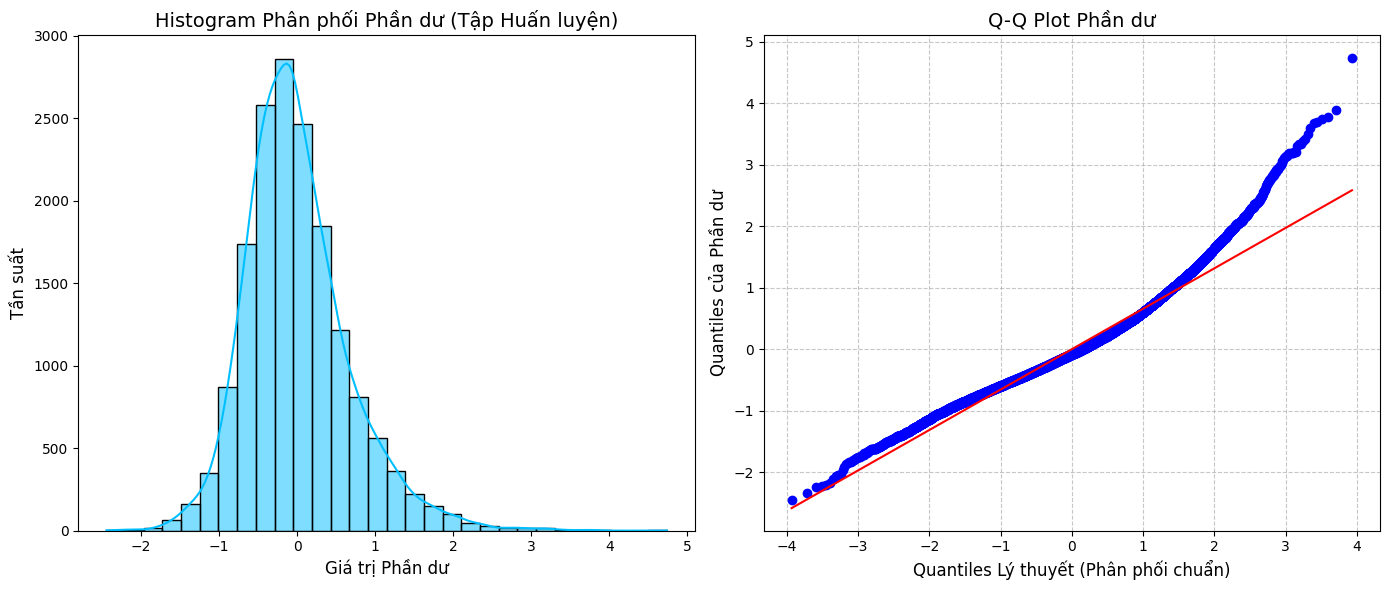

In [ ]:
# Để kiểm tra phần dư, chúng ta cần dự đoán trên chính tập huấn luyện
y_train_pred = lr_model.predict(X_train)
residuals = y_train - y_train_pred

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30, color='deepskyblue')
plt.title('Histogram Phân phối Phần dư (Tập Huấn luyện)', fontsize=14)
plt.xlabel('Giá trị Phần dư', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)

plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot Phần dư', fontsize=14)
plt.ylabel('Quantiles của Phần dư', fontsize=12)
plt.xlabel('Quantiles Lý thuyết (Phân phối chuẩn)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**<h2>Phân tích phần dư (Residuals) của mô hình:<h2>**
* **Histogram:**
  *   **Hình dạng chung:** Biểu đồ histogram có hình dạng **gần giống hình chuông**, với đỉnh cao nhất tập trung quanh giá trị `0`.
      *   **Điểm tích cực:** Điều này cho thấy rằng **trung bình sai số của mô hình là gần 0**, ngụ ý mô hình không bị thiên lệch hệ thống (không dự đoán quá cao hoặc quá thấp một cách nhất quán).
  *   **Độ lệch (Skewness):**
      *   **Quan sát:** Có dấu hiệu biểu đồ **hơi bị lệch về bên phải** (đuôi bên phải dài hơn một chút).
      *   **Hàm ý:** Mô hình **có xu hướng tạo ra một số lỗi dự đoán dương lớn** (dự đoán thấp hơn giá trị thực) nhiều hơn hoặc lớn hơn so với các lỗi dự đoán âm lớn.

* **Q-Q Plot:**
  *   **Mục đích:** So sánh các phân vị (quantiles) của phần dư thực tế với các phân vị lý thuyết của một phân phối chuẩn hoàn hảo (đường chéo màu đỏ). Nếu phần dư tuân theo phân phối chuẩn, các điểm màu xanh lam nên nằm sát trên đường màu đỏ.
  *   **Quan sát chi tiết:**
      *   **Phần trung tâm:** Các điểm **bám khá sát đường chéo màu đỏ**, cho thấy sự phù hợp tốt quanh giá trị trung bình của phần dư.
      *   **Đuôi bên phải (`Quantiles Lý thuyết` dương lớn):** Các điểm nằm rõ rệt **cao hơn đường màu đỏ**. Điều này có nghĩa là các giá trị phần dư dương lớn nhất thực tế *lớn hơn* (dương hơn) so với mong đợi từ phân phối chuẩn.
      *   **Đuôi bên trái (`Quantiles Lý thuyết` âm lớn):** Các điểm cũng có xu hướng **nằm cao hơn đường màu đỏ** (dù có thể ít rõ ràng hơn đuôi phải). Điều này có nghĩa là các giá trị phần dư âm lớn nhất thực tế *không âm bằng* (gần với 0 hơn) so với mong đợi từ phân phối chuẩn.
  *   **Ý nghĩa & Kết luận:**
      *   Sự lệch khỏi đường chéo ở cả hai đuôi (đặc biệt là đuôi phải) xác nhận rằng **phần dư *không* tuân theo phân phối chuẩn.** Giả định về tính chuẩn của phần dư (quan trọng cho một số suy diễn thống kê) có thể bị vi phạm.
      *   Việc đuôi phải nằm cao hơn cho thấy **mô hình tạo ra các lỗi dự đoán dương lớn (under-prediction) nhiều hơn/lớn hơn dự kiến** theo phân phối chuẩn.
      *   Việc cả hai đuôi đều có xu hướng nằm trên đường chuẩn (ít cực đoan hơn dự kiến ở bên trái, cực đoan hơn dự kiến ở bên phải) phù hợp với quan sát về **độ lệch phải** từ histogram.
  
**Tổng hợp:** Mặc dù phần dư tập trung quanh 0 (ít thiên lệch), chúng **không tuân theo phân phối chuẩn**, chủ yếu do sự xuất hiện của các lỗi dự đoán dương lớn hơn mong đợi. Điều này có thể ảnh hưởng đến độ tin cậy của các khoảng tin cậy hoặc kiểm định giả thuyết dựa trên giả định chuẩn của phần dư.

In [ ]:
# Kiểm định Shapiro-Wilk
shapiro_test_stat, shapiro_p_value = stats.shapiro(residuals)
print(f"\nKiểm định Shapiro-Wilk:")
print(f"   - Statistics: {shapiro_test_stat:.4f}")
print(f"   - p-value: {shapiro_p_value:.10f}")
if shapiro_p_value < 0.05:
    print("   - Kết luận (Shapiro): Phân phối phần dư có vẻ KHÔNG chuẩn (p < 0.05).")
else:
    print("   - Kết luận (Shapiro): Không đủ bằng chứng bác bỏ phân phối chuẩn (p >= 0.05).")


Kiểm định Shapiro-Wilk:
   - Statistics: 0.9615
   - p-value: 0.0000000000
   - Kết luận (Shapiro): Phân phối phần dư có vẻ KHÔNG chuẩn (p < 0.05).


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16512.
  res = hypotest_fun_out(*samples, **kwds)


**<h2>Insight: Kiểm định chuẩn phần dư (Shapiro-Wilk)<h2>**

**Mục đích Kiểm định:**

*   **Kiểm định Shapiro-Wilk** được sử dụng để kiểm tra giả thuyết không (*H0*) rằng: *"Dữ liệu (trong trường hợp này là phần dư của mô hình) được lấy từ một tổng thể có phân phối chuẩn"*.

**Kết quả:**

*   **Test Statistic:** `` `0.9615` ``
*   **p-value:** `` `0.0000000000...` `` (một giá trị cực kỳ gần 0)

**Lý giải (Reasoning):**

*   **Quy tắc quyết định:** Nếu `p-value` nhỏ hơn mức ý nghĩa alpha (thường chọn `alpha = 0.05`), chúng ta **bác bỏ** giả thuyết không (*H0*).
*   **Áp dụng:** Trong trường hợp này, `p-value` (≈ 0) **<** `0.05`.
*   **Kết luận:** Do đó, chúng ta **bác bỏ giả thuyết không (*H0*)**.

**Kết luận Chính:**

*   Dựa trên kết quả của kiểm định Shapiro-Wilk, có **bằng chứng thống kê mạnh mẽ** để kết luận rằng **phân phối của phần dư *không* phải là phân phối chuẩn.** Kết quả này nhất quán với những gì quan sát được từ biểu đồ Histogram và Q-Q Plot trước đó.

⚠️ **Lưu ý về p-value Rất Nhỏ:**

Việc p-value cực kỳ nhỏ có thể được giải thích bởi sự kết hợp của các yếu tố:

1.  **Sự Sai lệch Thực tế:** Như đã phân tích từ biểu đồ, phần dư thực sự *có* độ lệch và hình dạng đuôi khác biệt so với phân phối chuẩn. Kiểm định chỉ đang định lượng mức độ khác biệt này.
2.  **Độ nhạy với Cỡ mẫu Lớn:** Các kiểm định chuẩn như Shapiro-Wilk rất nhạy cảm khi cỡ mẫu lớn (N lớn hơn hàng nghìn trong tập huấn luyện này). Ngay cả những sai lệch nhỏ so với phân phối chuẩn hoàn hảo cũng có thể dẫn đến p-value rất nhỏ với dữ liệu lớn.
3.  **Cảnh báo từ Thư viện (`scipy.stats.shapiro`):**
    > *"For N > 5000, computed p-value may not be accurate."*
    *   *Ý nghĩa cảnh báo:* Điều này không nhất thiết có nghĩa kết luận là sai, nhưng giá trị p-value *cực kỳ* gần 0 có thể là do giới hạn về độ chính xác tính toán của thuật toán hoặc độ nhạy cực cao với cỡ mẫu rất lớn, chứ không chỉ hoàn toàn do mức độ sai lệch khỏi chuẩn. Tuy nhiên, kết luận chung về việc *không chuẩn* vẫn được hỗ trợ mạnh mẽ.


**Tóm lại:** Kiểm định Shapiro-Wilk cung cấp bằng chứng định lượng mạnh mẽ rằng phần dư của mô hình không tuân theo phân phối chuẩn, xác nhận các quan sát từ phân tích trực quan.

**<h2>Tóm lại:**
- Kết hợp cả trực quan hóa (Histogram, Q-Q Plot) và kiểm định thống kê (Shapiro-Wilk), chúng ta **có thể kết luận rằng giả định về phân phối chuẩn của phần dư không được thỏa mãn cho mô hình hồi quy tuyến tính cơ sở này.**
- Sự không chuẩn này cho thấy **mô hình tuyến tính có thể chưa nắm bắt hết cấu trúc phức tạp trong dữ liệu.**

### 3.2.2 Không đa cộng tuyến mạnh: tính hệ số VIF cho các biến đầu vào

In [ ]:
# Tính VIF trên dữ liệu *trước khi scale* để đánh giá cấu trúc tương quan gốc
# Cần sử dụng X_train gốc (lấy lại từ X và index của X_train đã scale)

# Lấy lại X_train gốc (chưa scale): X_train_original chứa dữ liệu gốc, chưa scale của chính xác những hàng đã scale)
X_train_original = X.loc[X_train.index] # Dùng index của X_train (đã scale) để lấy hàng tương ứng từ X gốc

# Thêm cột hằng số vào dữ liệu gốc để tính VIF (cách tính phổ biến)
X_train_vif = sm.add_constant(X_train_original, prepend=True)

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Sắp xếp VIF giảm dần
vif_data = vif_data[vif_data["feature"] != 'const']
print(vif_data.sort_values(by='VIF', ascending=False))



      feature        VIF
7    Latitude  10.145763
8   Longitude   9.508937
1      MedInc   3.176809
3    AveRooms   2.877951
4   AveBedrms   1.269621
2    HouseAge   1.245035
5  Population   1.202030
6    AveOccup   1.157033


**<h2>Insight:Phân tích Hệ số Phóng đại Phương sai (VIF)**

**Xác nhận Vấn đề Đa cộng tuyến:**

*   Kết quả VIF xác nhận rằng **đa cộng tuyến là một vấn đề đáng kể** trong tập dữ liệu này.

**Nguồn gốc Chính: `Latitude` & `Longitude`**

*   Đa cộng tuyến chủ yếu **xuất phát từ** mối quan hệ nội tại cực kỳ mạnh mẽ giữa **`Latitude`** và **`Longitude`** (như đã thấy qua hệ số tương quan ≈ -0.92).
*  **Hàm ý:** Mối tương quan chặt chẽ này có thể làm cho các hệ số hồi quy ước tính cho `Latitude` và `Longitude` trong mô hình OLS trở nên **rất không ổn định** (nhạy cảm với thay đổi nhỏ trong dữ liệu) và **khó diễn giải ý nghĩa độc lập** của từng biến. Sai số chuẩn (standard errors) của các hệ số này cũng sẽ bị "thổi phồng" lên đáng kể.

**Nguồn gốc Phụ: `MedInc` & `AveRooms`**

*   Mối quan hệ giữa **`MedInc`** và **`AveRooms`** cũng đóng góp một phần vào đa cộng tuyến, **nhưng ở mức độ thấp hơn nhiều** so với cặp Latitude/Longitude (thể hiện qua giá trị VIF của chúng thấp hơn đáng kể so với VIF của biến vị trí).

**Các Biến Khác:**

*   Đa cộng tuyến là **rất thấp** đối với các biến còn lại (giá trị VIF rất gần 1), cho thấy chúng ít bị ảnh hưởng bởi vấn đề này.



**Hàm ý & hành động tiếp theo:**

*   Phát hiện này **cung cấp lý do mạnh mẽ để ưu tiên sử dụng các kỹ thuật Chính quy hóa (Regularization) như Ridge và Lasso** trong các bước xây dựng mô hình tiếp theo.
*   **Tại sao?** Các kỹ thuật này được thiết kế đặc biệt để **xử lý các vấn đề do đa cộng tuyến gây ra**, giúp:
    *   Ổn định các hệ số hồi quy.
    *   Cải thiện khả năng tổng quát hóa của mô hình trên dữ liệu mới.
*   **Lựa chọn kỹ thuật:**
    *   **Ridge Regression:** Đặc biệt hiệu quả trong việc giữ lại tất cả các biến nhưng *giảm thiểu ảnh hưởng* của các biến có cộng tuyến mạnh bằng cách "co nhỏ" hệ số của chúng.
    *   **Lasso Regression:** Có khả năng thực hiện *lựa chọn biến* bằng cách đưa hệ số của một số biến (có thể là một trong các biến cộng tuyến cao hoặc biến ít quan trọng) về chính xác bằng 0.

**Kết luận:** Việc xác nhận đa cộng tuyến cao, đặc biệt giữa `Latitude` và `Longitude`, củng cố mạnh mẽ quyết định khám phá và áp dụng các mô hình chính quy hóa (Ridge, Lasso) để xây dựng một mô hình dự đoán giá nhà ổn định và đáng tin cậy hơn.

## 3.3. Tạo các biến mới



### 3.3.1 Tạo biến mới

**<h2>3.3.1.1 Tạo biến mới kết hợp từ Latitude và Longtitude**

**<h2>a. Lý do sử dụng Biến Vùng Địa Lý (Từ Kinh độ và Vĩ độ):**
- **Vượt qua giới hạn của mối quan hệ tuyến tính đơn giản:** Mô hình hồi quy tuyến tính cơ sở **giả định rằng giá nhà thay đổi một cách tuyến tính và độc lập theo từng đơn vị tăng/giảm của vĩ độ và kinh độ**. *Tuy nhiên,* **thực tế** thị trường bất động sản không hoạt động như vậy. Giá trị của một vị trí thường **không phụ thuộc tuyến tính vào tọa độ tuyệt đối** mà phụ thuộc vào việc nó nằm trong **khu vực (vùng) nào** với các đặc điểm kinh tế-xã hội, tiện ích và sức hấp dẫn riêng biệt (ví dụ: gần biển, gần trung tâm thành phố, thuộc khu vực ngoại ô yên tĩnh, hay nằm trong thung lũng nông nghiệp).
- **Giải quyết đa cộng tuyến và tăng khả năng diễn giải:** Phân tích VIF cho thấy đa cộng tuyến cực kỳ cao giữa Latitude và Longitude (VIF ≈ 10), làm cho hệ số của chúng trong mô hình OLS trở nên không ổn định và khó diễn giải ý nghĩa độc lập. Bằng cách **nhóm các tọa độ thành các vùng địa lý có ý nghĩa** (ví dụ: 'Bay Area', 'SoCalCoastal'), chúng ta tạo ra các biến giả (dummy variables) mới. Các biến này:
  - **Nắm bắt hiệu ứng khu vực:** Mỗi biến giả đại diện cho sự khác biệt trung bình về giá của một vùng cụ thể so với vùng tham chiếu, sau khi đã kiểm soát các yếu tố khác. **Điều này phản ánh trực quan hơ**n cách vị trí ảnh hưởng đến giá.
  - **Giảm tác động của đa cộng tuyến:** Thay vì dựa vào hai biến gốc có tương quan cao, mô hình giờ đây học từ các biến vùng (ít tương quan với nhau hơn nhiều), giúp **ổn định hóa các ước lượng** và tăng độ tin cậy.
- **Mô hình hóa sự khác biệt vùng:** Việc tạo biến vùng cho phép mô hình có một **"mức giá cơ sở" khác nhau cho từng khu vực.** Điều này hiệu quả trong việc mô hình hóa sự thay đổi **phi tuyến tính và không liên tục** của giá nhà theo không gian địa lý, điều mà các biến tọa độ tuyến tính đơn lẻ không thể làm được.

**<h2> b. Tiến hành tạo biến mới dựa trên Latitude và Longtitude**

In [ ]:
# --- Tạo bản sao để làm việc  ---
data_with_regions = data_final.copy()

print("--- Phân cụm địa lý dựa trên tọa độ ---")
# --- Định nghĩa các điều kiện và tên vùng ---

# Danh sách các điều kiện (boolean Series)
conditions = [
    # 1. Bay Area (Rough boundaries)
    (data_with_regions['Latitude'] >= 37.0) & (data_with_regions['Latitude'] < 38.5) & (data_with_regions['Longitude'] <= -121.5) & (data_with_regions['Longitude'] >= -123.0),
    # 2. Southern California Coastal (LA/Orange County/San Diego - Rough)
    (data_with_regions['Latitude'] < 34.5) & (data_with_regions['Longitude'] >= -119.0),
    # 3. Inland Empire / High Desert (East of LA)
    (data_with_regions['Latitude'] < 35.5) & (data_with_regions['Longitude'] < -117.0) & (data_with_regions['Longitude'] >= -119.0),
    # 4. Central Coast (Between LA and Bay Area, coastal side)
    (data_with_regions['Latitude'] >= 34.5) & (data_with_regions['Latitude'] < 37.0) & (data_with_regions['Longitude'] > -121.5),
     # 5. Central Valley (Inland, between mountains)
    (data_with_regions['Latitude'] >= 35.0) & (data_with_regions['Latitude'] < 39.5) & (data_with_regions['Longitude'] < -119.0) & (data_with_regions['Longitude'] > -121.5),
    # 6. Sacramento Area (Near Central Valley northern end)
    (data_with_regions['Latitude'] >= 38.0) & (data_with_regions['Latitude'] < 39.5) & (data_with_regions['Longitude'] <= -121.0) & (data_with_regions['Longitude'] > -122.0),
    # 7. Far North California
    (data_with_regions['Latitude'] >= 39.5)
]

# Danh sách các tên vùng tương ứng với điều kiện
region_names = [
    'BayArea',
    'SoCalCoastal',
    'InlandEmpire',
    'CentralCoast',
    'CentralValley',
    'SacramentoArea',
    'FarNorth'
]

# --- Áp dụng np.select để tạo cột 'Region' ---
# default='Other' cho những điểm không khớp với bất kỳ điều kiện nào ở trên
data_with_regions['Region'] = np.select(conditions, region_names, default='Other_Region')

print("\nPhân bổ số lượng mẫu theo các vùng được tạo:")
print(data_with_regions['Region'].value_counts())

# --- Bước tiếp theo: Chuyển đổi biến 'Region' thành biến giả ---
print("\n--- Tạo biến giả (Dummy Variables) từ cột 'Region' ---")
# drop_first=True để tránh đa cộng tuyến hoàn hảo giữa các biến giả
data_with_regions_dummies = pd.get_dummies(data_with_regions, columns=['Region'], drop_first=True, dtype=int)

print("\n5 dòng đầu của dữ liệu sau khi thêm biến giả cho vùng:")
print(data_with_regions_dummies.head())

print("\nCác cột mới được tạo ra:")
# Tìm các cột mới có tên bắt đầu bằng "Region_"
new_dummy_cols = [col for col in data_with_regions_dummies.columns if col.startswith('Region_')]
print(new_dummy_cols)


--- Phân cụm địa lý dựa trên tọa độ ---

Phân bổ số lượng mẫu theo các vùng được tạo:
Region
SoCalCoastal      10568
BayArea            4419
CentralValley      2033
CentralCoast       1500
Other_Region        962
FarNorth            598
InlandEmpire        313
SacramentoArea      247
Name: count, dtype: int64

--- Tạo biến giả (Dummy Variables) từ cột 'Region' ---

5 dòng đầu của dữ liệu sau khi thêm biến giả cho vùng:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  6.493762      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  6.045277      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.257400      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.643100      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.846200      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  Region_CentralCoast  Region_CentralValley  \
0    -122.23  4.526                    0  

**<h2> c. Chạy lại mô hình Linear Regression để so sánh trước và sau khi thêm biến vùng**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Lưu lại R2 của mô hình cơ sở để so sánh ---
r2_baseline = 0.6431

print("--- Huấn luyện lại Linear Regression với Biến Vùng Địa Lý ---")

# 1. Tách Features (X_new) và Target (y_new)
# Loại bỏ cột PRICE và cột Region gốc
X_new = data_with_regions_dummies.drop(columns=['PRICE', 'Region'], errors='ignore')
y_new = data_with_regions_dummies['PRICE']

# 2. Xác định các cột số gốc và cột dummy mới
# Cột số gốc (cần scale) - lấy từ 'feature_names' ban đầu
original_numerical_cols = [col for col in feature_names if col in X_new.columns]
# Cột dummy (không scale) - các cột bắt đầu bằng 'Region_'
dummy_cols = [col for col in X_new.columns if col.startswith('Region_')]

print(f"\nCột số sẽ được scale: {original_numerical_cols}")
print(f"Cột dummy (vùng) sẽ giữ nguyên: {dummy_cols}")

# 3. Thiết lập Preprocessor với ColumnTransformer
# Áp dụng StandardScaler cho cột số và bỏ qua ('passthrough') cột dummy
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), original_numerical_cols),
        ('cat', 'passthrough', dummy_cols) # Giữ nguyên các cột dummy
    ],
    remainder='passthrough' # Giữ lại các cột khác nếu có (nên kiểm tra)
)

# 4. Chia dữ liệu (trước khi áp dụng preprocessor trong pipeline)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42
)
print(f"\nKích thước tập huấn luyện mới: X={X_train_new.shape}, y={y_train_new.shape}")
print(f"Kích thước tập kiểm tra mới: X={X_test_new.shape}, y={y_test_new.shape}")


# 5. Tạo Pipeline kết hợp Preprocessing và Mô hình Linear Regression
lr_model_region = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 6. Huấn luyện mô hình trên tập huấn luyện mới
lr_model_region.fit(X_train_new, y_train_new)
print("\nĐã huấn luyện mô hình Linear Regression với biến vùng.")

# 7. Dự đoán trên tập kiểm tra mới
y_pred_region = lr_model_region.predict(X_test_new)

# 8. Đánh giá mô hình mới
r2_region = r2_score(y_test_new, y_pred_region)
mae_region = mean_absolute_error(y_test_new, y_pred_region)
rmse_region = np.sqrt(mean_squared_error(y_test_new, y_pred_region))

print("\n--- Kết quả đánh giá mô hình LR với Biến Vùng trên tập Test ---")
print(f"R-squared (R2) mới:           {r2_region:.4f}")
print(f"Mean Absolute Error (MAE) mới: {mae_region:.4f}")
print(f"Root Mean Squared Error (RMSE) mới: {rmse_region:.4f}")



--- Huấn luyện lại Linear Regression với Biến Vùng Địa Lý ---

Cột số sẽ được scale: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Cột dummy (vùng) sẽ giữ nguyên: ['Region_CentralCoast', 'Region_CentralValley', 'Region_FarNorth', 'Region_InlandEmpire', 'Region_Other_Region', 'Region_SacramentoArea', 'Region_SoCalCoastal']

Kích thước tập huấn luyện mới: X=(16512, 15), y=(16512,)
Kích thước tập kiểm tra mới: X=(4128, 15), y=(4128,)

Đã huấn luyện mô hình Linear Regression với biến vùng.

--- Kết quả đánh giá mô hình LR với Biến Vùng trên tập Test ---
R-squared (R2) mới:           0.6524
Mean Absolute Error (MAE) mới: 0.5055
Root Mean Squared Error (RMSE) mới: 0.6749


**<h2>Insight:**
- Kết quả (Metrics):
  - R-squared (R2) mới: 0.6524
  - Mean Absolute Error (MAE) mới: 0.5055
  - Root Mean Squared Error (RMSE) mới: 0.6749
- Rút ra kết luận: So với R2 của mô hình cơ sở (~0.6431), R2 đã **tăng nhẹ** lên 0.6524. MAE và RMSE cũng giảm một chút. Điều này **xác nhận giá trị của việc thêm thông tin vùng địa lý**. Mô hình giờ đây giải thích được thêm một phần nhỏ phương sai của giá nhà bằng cách xem xét sự khác biệt giữa các vùng. **Mặc dù mức cải thiện không quá lớn,** nó **chứng tỏ rằng yếu tố vùng là có ý nghĩa** và **việc xử lý vị trí theo cách này tốt hơn là chỉ dùng Latitude và Longitude tuyến tính** (vốn bị ảnh hưởng bởi đa cộng tuyến).

**<h2>3.3.1.2 Tạo biến mới: Biến đa thức/Tương tác**

**<h2>a. Lý do sử dụng Biến Đa thức/Tương tác (AveRooms_sq, Rooms_Bedrms_int):**
- **Nắm bắt các mối quan hệ phi tuyến của đặc trưng nhà ở:** Mô hình tuyến tính cơ sở giả định rằng mỗi phòng (AveRooms) tăng thêm sẽ làm tăng giá nhà một lượng không đổi, bất kể ngôi nhà đã có bao nhiêu phòng. Thực tế có thể không như vậy.
  - **Lợi ích giảm dần/tăng dần (AveRooms_sq):** Việc thêm biến AveRooms_sq (bình phương số phòng trung bình) cho phép mô hình nắm bắt các hiệu ứng phi tuyến. Ví dụ, lợi ích (về giá) của việc thêm phòng thứ 6 có thể khác biệt so với việc thêm phòng thứ 2 (có thể là lợi ích giảm dần hoặc tăng dần ở một ngưỡng nào đó). Biến bình phương giúp mô hình tạo ra một đường cong thay vì một đường thẳng khi biểu diễn mối quan hệ giữa số phòng và giá.
- **Mô hình hóa hiệu ứng tương tác (Rooms_Bedrms_int):** Ảnh hưởng của một biến lên giá nhà có thể phụ thuộc vào giá trị của một biến khác.
  - **Tương tác giữa số phòng và số phòng ngủ:** Biến Rooms_Bedrms_int (tích của AveRooms và AveBedrms) được tạo ra để kiểm tra giả thuyết rằng ảnh hưởng của tổng số phòng (AveRooms) lên giá nhà có thể thay đổi tùy thuộc vào tỷ lệ phòng ngủ (AveBedrms) trong đó. Ví dụ, một ngôi nhà lớn (nhiều AveRooms) nhưng có tỷ lệ phòng ngủ thấp có thể được định giá khác so với một ngôi nhà cùng kích thước nhưng có nhiều phòng ngủ hơn. Biến tương tác này giúp mô hình nắm bắt sự phức tạp đó.
- **Cải thiện khả năng dự đoán:** Mục tiêu cuối cùng là xây dựng một mô hình dự đoán chính xác hơn. Nếu các mối quan hệ thực tế là phi tuyến hoặc có tương tác, việc thêm các biến này sẽ cho phép mô hình khớp với dữ liệu tốt hơn và giảm sai số dự đoán.

**<h2>b. Tiến hành tạo biến mới: Biến đa thức/Tương tác**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Hiển thị lại R2 khi mô hình chỉ mới thêm biến vùng
print(f"R2 của mô hình chỉ có biến vùng: {r2_region:.4f}")

print("\n--- Kết hợp Biến Vùng và Biến Đa thức/Tương tác ---")

# 1. Tạo DataFrame mới bằng cách thêm biến đa thức/tương tác
data_combined_features = data_with_regions_dummies.copy()

# Tính toán các biến mới từ các cột gốc trong DataFrame này
data_combined_features['AveRooms_sq'] = data_combined_features['AveRooms']**2
data_combined_features['Rooms_Bedrms_int'] = data_combined_features['AveRooms'] * data_combined_features['AveBedrms']
print("   - Đã thêm biến 'AveRooms_sq'")
print("   - Đã thêm biến 'Rooms_Bedrms_int'")

# 2. Tách Features (X_combined) và Target (y_combined)
X_combined = data_combined_features.drop(columns=['PRICE', 'Region'], errors='ignore')
y_combined = data_combined_features['PRICE']

# 3. Xác định các cột số (cần scale) và cột dummy (giữ nguyên)
# Cột số gốc
original_numerical_cols = [col for col in feature_names if col in X_combined.columns]
# Cột số mới (đa thức/tương tác)
new_numerical_cols = ['AveRooms_sq', 'Rooms_Bedrms_int']
# Tất cả cột số cần scale
all_numerical_cols = original_numerical_cols + new_numerical_cols
# Cột dummy (vùng)
dummy_cols = [col for col in X_combined.columns if col.startswith('Region_')]

print(f"\nTất cả cột số sẽ được scale: {all_numerical_cols}")
print(f"Cột dummy (vùng) sẽ giữ nguyên: {dummy_cols}")

# 4. Thiết lập Preprocessor mới với ColumnTransformer
preprocessor_combined = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), all_numerical_cols), # Scale tất cả cột số
        ('cat', 'passthrough', dummy_cols)         # Giữ nguyên cột dummy
    ],
    remainder='passthrough' # Đảm bảo không cột nào bị bỏ sót tình cờ
)

# 5. Chia dữ liệu kết hợp
X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)
print(f"\nKích thước tập huấn luyện kết hợp: X={X_train_comb.shape}, y={y_train_comb.shape}")
print(f"Kích thước tập kiểm tra kết hợp: X={X_test_comb.shape}, y={y_test_comb.shape}")


# 6. Tạo Pipeline kết hợp Preprocessing và Mô hình Linear Regression
lr_model_combined = Pipeline(steps=[
    ('preprocessor', preprocessor_combined),
    ('regressor', LinearRegression())
])


R2 của mô hình chỉ có biến vùng: 0.6524

--- Kết hợp Biến Vùng và Biến Đa thức/Tương tác ---
   - Đã thêm biến 'AveRooms_sq'
   - Đã thêm biến 'Rooms_Bedrms_int'

Tất cả cột số sẽ được scale: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'AveRooms_sq', 'Rooms_Bedrms_int']
Cột dummy (vùng) sẽ giữ nguyên: ['Region_CentralCoast', 'Region_CentralValley', 'Region_FarNorth', 'Region_InlandEmpire', 'Region_Other_Region', 'Region_SacramentoArea', 'Region_SoCalCoastal']

Kích thước tập huấn luyện kết hợp: X=(16512, 17), y=(16512,)
Kích thước tập kiểm tra kết hợp: X=(4128, 17), y=(4128,)


**<h2>c. Chạy lại mô hình Linear Regression để so sánh trước và sau khi MH thêm biến Đa thức/tương tác so với MH gốc và MH chỉ có Biến vùng**

In [ ]:
# 7. Huấn luyện mô hình trên tập huấn luyện kết hợp
lr_model_combined.fit(X_train_comb, y_train_comb)
print("\nĐã huấn luyện mô hình Linear Regression với cả biến vùng và biến đa thức/tương tác.")

# 8. Dự đoán trên tập kiểm tra kết hợp
y_pred_comb = lr_model_combined.predict(X_test_comb)

# 9. Đánh giá mô hình kết hợp
r2_comb = r2_score(y_test_comb, y_pred_comb)
mae_comb = mean_absolute_error(y_test_comb, y_pred_comb)
rmse_comb = np.sqrt(mean_squared_error(y_test_comb, y_pred_comb))

print("\n--- Kết quả đánh giá mô hình LR Kết hợp trên tập Test ---")
print(f"R-squared (R2) kết hợp:           {r2_comb:.4f}")
print(f"Mean Absolute Error (MAE) kết hợp: {mae_comb:.4f}")
print(f"Root Mean Squared Error (RMSE) kết hợp: {rmse_comb:.4f}")



Đã huấn luyện mô hình Linear Regression với cả biến vùng và biến đa thức/tương tác.

--- Kết quả đánh giá mô hình LR Kết hợp trên tập Test ---
R-squared (R2) kết hợp:           0.6713
Mean Absolute Error (MAE) kết hợp: 0.4877
Root Mean Squared Error (RMSE) kết hợp: 0.6563


**<h2>Insight:**
- Kết quả (Metrics):
  - R-squared (R2) kết hợp: 0.**6713**
  - Mean Absolute Error (MAE) kết hợp: 0.4877
  - Root Mean Squared Error (RMSE) kết hợp: 0.6563
- Rút ra kết luận: Đây là kết quả **cải thiện đáng kể nhất**. R-squared tăng rõ rệt từ 0.6524 (chỉ có vùng) lên 0.6713. MAE và RMSE cũng giảm xuống mức thấp nhất trong các thử nghiệm. Điều này cho thấy:
  - Các biến đa thức/tương tác (AveRooms_sq, Rooms_Bedrms_int) đã nắm bắt được các mối quan hệ phi tuyến/tương tác quan trọng mà mô hình trước đó bỏ lỡ.
  - **Có hiệu ứng cộng hưởng tích cực** khi kết hợp cả thông tin vùng và thông tin chi tiết hơn về đặc điểm nhà ở (đã được biến đổi). Mô hình giờ đây vừa phân biệt được giá giữa các vùng, vừa mô hình hóa tốt hơn ảnh hưởng của số phòng/phòng ngủ trong từng vùng đó.
  - Đây là mô hình Linear Regression **tốt nhất thu được cho đến hiện tại** trong quy trình này.

## 3.4 Chỉnh hóa mô hình



### 3.4.1 Sử dụng kỹ thuật Ridge và Lasso để giảm hiện tượng overfitting

In [ ]:
# --- Thiết lập Pipeline cho Ridge ---
# Sử dụng lại preprocessor_combined đã định nghĩa ở bước trước
# Alpha là tham số chỉnh hóa. alpha=1.0 là giá trị mặc định tốt để bắt đầu.
# Giá trị alpha tối ưu thường được tìm bằng Cross-Validation (ví dụ: RidgeCV hoặc GridSearchCV).
pipe_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor_combined),
    ('ridge', Ridge(alpha=1.0, random_state=42)) # alpha=1.0 là điểm khởi đầu
    ])

# --- Thiết lập Pipeline cho Lasso ---
# Lasso thường yêu cầu alpha nhỏ hơn Ridge.
# Tăng max_iter vì Lasso có thể cần nhiều lần lặp hơn để hội tụ.
# Giá trị alpha tối ưu cũng cần được tìm bằng CV.
pipe_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor_combined),
    # Thử alpha nhỏ, ví dụ 0.001. Nếu hệ số về 0 hết -> giảm alpha. Nếu giống OLS -> tăng alpha.
    ('lasso', Lasso(alpha=0.001, random_state=42, max_iter=5000, tol=1e-3))
    ])


# --- Huấn luyện các mô hình chỉnh hóa ---
pipe_ridge.fit(X_train_comb, y_train_comb)
pipe_lasso.fit(X_train_comb, y_train_comb)

# --- Dự đoán trên tập kiểm tra ---
y_pred_ridge = pipe_ridge.predict(X_test_comb)
y_pred_lasso = pipe_lasso.predict(X_test_comb)


In [ ]:
# --- Đánh giá mô hình Ridge ---
r2_ridge = r2_score(y_test_comb, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test_comb, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test_comb, y_pred_ridge))

print("\n--- Kết quả đánh giá mô hình Ridge trên tập Test ---")
print(f"R-squared (R2):           {r2_ridge:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")
print(f"   -> Thay đổi so với LR kết hợp: R2={r2_ridge-r2_comb:.4f}, MAE={mae_ridge-mae_comb:.4f}, RMSE={rmse_ridge-rmse_comb:.4f}")

# --- Đánh giá mô hình Lasso ---
r2_lasso = r2_score(y_test_comb, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_comb, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test_comb, y_pred_lasso))

print("\n--- Kết quả đánh giá mô hình Lasso trên tập Test ---")
print(f"R-squared (R2):           {r2_lasso:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.4f}")
print(f"   -> Thay đổi so với LR kết hợp: R2={r2_lasso-r2_comb:.4f}, MAE={mae_lasso-mae_comb:.4f}, RMSE={rmse_lasso-rmse_comb:.4f}")


--- Kết quả đánh giá mô hình Ridge trên tập Test ---
R-squared (R2):           0.6713
Mean Absolute Error (MAE): 0.4877
Root Mean Squared Error (RMSE): 0.6563
   -> Thay đổi so với LR kết hợp: R2=-0.0000, MAE=0.0000, RMSE=0.0000

--- Kết quả đánh giá mô hình Lasso trên tập Test ---
R-squared (R2):           0.6710
Mean Absolute Error (MAE): 0.4882
Root Mean Squared Error (RMSE): 0.6566
   -> Thay đổi so với LR kết hợp: R2=-0.0004, MAE=0.0005, RMSE=0.0004


**<h2>Insight:**

- **Quan sát ban đầu:** Khi áp dụng Ridge (alpha=1.0) và Lasso (alpha=0.001) sau các bước feature engineering hiệu quả, kết quả đánh giá (R², MAE, RMSE) trên tập test **gần như không thay đổi** so với mô hình Linear Regression (OLS) tương ứng.
- **Câu hỏi mấu chốt:** Sự không thay đổi này là do bản chất chỉnh hóa không phù hợp, hay do ***mức độ chỉnh hóa (alpha) được chọn chưa tối ưu?*** Giá trị alpha quyết định sức mạnh của chỉnh hóa – quá nhỏ sẽ giống OLS, quá lớn sẽ gây underfitting.
- **Giải pháp:** Để đánh giá đúng tiềm năng của Ridge/Lasso, cần tìm alpha tốt nhất. **Cross-Validation (CV)** là phương pháp chuẩn để làm điều này bằng cách thử nhiều giá trị alpha trên các phần khác nhau của tập huấn luyện.
- **Công cụ:** RidgeCV và LassoCV tự động hóa quá trình tìm alpha tối ưu này.

=> **Kết luận:** **Do đó, việc kết quả ban đầu không thuyết phục đã dẫn đến bước logic tiếp theo là sử dụng RidgeCV/LassoCV để đảm bảo chúng ta đang tìm và đánh giá Ridge/Lasso ở mức hiệu suất tốt nhất có thể bằng cách xác định alpha phù hợp nhất.**

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

# --- Xác định một dải giá trị Alpha để thử nghiệm ---
alphas_to_test = np.logspace(-4, 4, 10) # Ví dụ: 10 giá trị từ 0.0001 đến 10000
print(f"\nDải giá trị Alpha sẽ được thử nghiệm: {alphas_to_test}")

# --- Thiết lập Pipeline cho RidgeCV ---
pipe_ridge_cv = Pipeline(steps=[
    ('preprocessor', preprocessor_combined),
    ('ridge_cv', RidgeCV(alphas=alphas_to_test,
                         scoring='neg_mean_squared_error',
                         cv=5)) # Sử dụng 5-fold CV để tìm alpha
    ])

# --- Thiết lập Pipeline cho LassoCV ---
pipe_lasso_cv = Pipeline(steps=[
    ('preprocessor', preprocessor_combined),
    ('lasso_cv', LassoCV(alphas=alphas_to_test, # Hoặc có thể để LassoCV tự chọn dải alpha (bỏ alphas=...)
                         cv=5, # Sử dụng 5-fold CV
                         random_state=42,
                         max_iter=10000, # Tăng max_iter
                         tol=1e-3))
    ])

# --- Huấn luyện các mô hình CV để tìm Alpha tốt nhất ---
pipe_ridge_cv.fit(X_train_comb, y_train_comb)
best_alpha_ridge = pipe_ridge_cv.named_steps['ridge_cv'].alpha_
print(f"Đã huấn luyện RidgeCV. Alpha tốt nhất được tìm thấy: {best_alpha_ridge:.6f}")

pipe_lasso_cv.fit(X_train_comb, y_train_comb)
best_alpha_lasso = pipe_lasso_cv.named_steps['lasso_cv'].alpha_
print(f"Đã huấn luyện LassoCV. Alpha tốt nhất được tìm thấy: {best_alpha_lasso:.6f}")

# --- Đánh giá các mô hình với Alpha tốt nhất trên tập Test ---
print("\n--- Đánh giá mô hình với Alpha tối ưu trên tập Test ---")

# Dự đoán bằng các pipeline đã fit (chứa mô hình với alpha tốt nhất)
y_pred_ridge_best = pipe_ridge_cv.predict(X_test_comb)
y_pred_lasso_best = pipe_lasso_cv.predict(X_test_comb)

# --- Thiết lập Pipeline cho LassoCV ---
pipe_lasso_cv = Pipeline(steps=[
    ('preprocessor', preprocessor_combined),
    ('lasso_cv', LassoCV(alphas=alphas_to_test, # Hoặc có thể để LassoCV tự chọn dải alpha (bỏ alphas=...)
                         cv=5, # Sử dụng 5-fold CV
                         random_state=42,
                         max_iter=10000, # Tăng max_iter
                         tol=1e-3))
        ])
# --- Huấn luyện các mô hình CV để tìm Alpha tốt nhất ---
pipe_ridge_cv.fit(X_train_comb, y_train_comb)
best_alpha_ridge = pipe_ridge_cv.named_steps['ridge_cv'].alpha_
print(f"Đã huấn luyện RidgeCV. Alpha tốt nhất được tìm thấy: {best_alpha_ridge:.6f}")

pipe_lasso_cv.fit(X_train_comb, y_train_comb)
best_alpha_lasso = pipe_lasso_cv.named_steps['lasso_cv'].alpha_
print(f"Đã huấn luyện LassoCV. Alpha tốt nhất được tìm thấy: {best_alpha_lasso:.6f}")

# --- Đánh giá các mô hình với Alpha tốt nhất trên tập Test ---
print("\n--- Đánh giá mô hình với Alpha tối ưu trên tập Test ---")

# Dự đoán bằng các pipeline đã fit (chứa mô hình với alpha tốt nhất)
y_pred_ridge_best = pipe_ridge_cv.predict(X_test_comb)
y_pred_lasso_best = pipe_lasso_cv.predict(X_test_comb)





Dải giá trị Alpha sẽ được thử nghiệm: [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Đã huấn luyện RidgeCV. Alpha tốt nhất được tìm thấy: 2.782559
Đã huấn luyện LassoCV. Alpha tốt nhất được tìm thấy: 0.000100

--- Đánh giá mô hình với Alpha tối ưu trên tập Test ---
Đã huấn luyện RidgeCV. Alpha tốt nhất được tìm thấy: 2.782559
Đã huấn luyện LassoCV. Alpha tốt nhất được tìm thấy: 0.000100

--- Đánh giá mô hình với Alpha tối ưu trên tập Test ---


In [ ]:
# Đánh giá Ridge với alpha tốt nhất
r2_ridge_best = r2_score(y_test_comb, y_pred_ridge_best)
mae_ridge_best = mean_absolute_error(y_test_comb, y_pred_ridge_best)
rmse_ridge_best = np.sqrt(mean_squared_error(y_test_comb, y_pred_ridge_best))

print(f"\nKết quả đánh giá Ridge (alpha={best_alpha_ridge:.6f}) trên tập Test:")
print(f"  R-squared (R2):           {r2_ridge_best:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_ridge_best:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_ridge_best:.4f}")
print(f"     -> Thay đổi so với LR kết hợp: R2={r2_ridge_best-r2_comb:.4f}, MAE={mae_ridge_best-mae_comb:.4f}, RMSE={rmse_ridge_best-rmse_comb:.4f}")

# Đánh giá Lasso với alpha tốt nhất
r2_lasso_best = r2_score(y_test_comb, y_pred_lasso_best)
mae_lasso_best = mean_absolute_error(y_test_comb, y_pred_lasso_best)
rmse_lasso_best = np.sqrt(mean_squared_error(y_test_comb, y_pred_lasso_best))

print(f"\nKết quả đánh giá Lasso (alpha={best_alpha_lasso:.6f}) trên tập Test:")
print(f"  R-squared (R2):           {r2_lasso_best:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_lasso_best:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lasso_best:.4f}")
print(f"     -> Thay đổi so với LR kết hợp: R2={r2_lasso_best-r2_comb:.4f}, MAE={mae_lasso_best-mae_comb:.4f}, RMSE={rmse_lasso_best-rmse_comb:.4f}")


Kết quả đánh giá Ridge (alpha=2.782559) trên tập Test:
  R-squared (R2):           0.6712
  Mean Absolute Error (MAE): 0.4878
  Root Mean Squared Error (RMSE): 0.6564
     -> Thay đổi so với LR kết hợp: R2=-0.0001, MAE=0.0001, RMSE=0.0001

Kết quả đánh giá Lasso (alpha=0.000100) trên tập Test:
  R-squared (R2):           0.6713
  Mean Absolute Error (MAE): 0.4877
  Root Mean Squared Error (RMSE): 0.6563
     -> Thay đổi so với LR kết hợp: R2=-0.0000, MAE=0.0000, RMSE=0.0000


**<h2>Insight:**
- **Kết luận về hiệu suất:** Mặc dù RidgeCV và LassoCV đã tìm ra các giá trị alpha tối ưu (≈2.78 cho Ridge, ≈0.0001 cho Lasso), hiệu suất của chúng trên tập test (R² ≈ 0.671) **vẫn không cải thiện đáng kể** so với mô hình Linear Regression (OLS) đã được feature engineering kỹ lưỡng.
- **Lý giải chính:**
  - **Feature Engineering là chìa khóa:** Phần lớn sự cải thiện hiệu suất đến từ việc tạo biến vùng và biến đa thức/tương tác.
  - **Ít Overfitting:** Mô hình OLS sau feature engineering đã khá tốt, không còn nhiều dư địa để chỉnh hóa cải thiện đáng kể độ chính xác dự đoán trên tập test này.
  - **Lasso xác nhận:** alpha tối ưu cực nhỏ của Lasso cho thấy nó không thấy cần thiết phải loại bỏ mạnh mẽ các features đã tạo.
- **Giới hạn của Mô hình Tuyến tính:** Chúng ta dường như đã khai thác hết khả năng của các phương pháp dựa trên hồi quy tuyến tính. Mức R² ≈ 0.67 có thể là giới hạn thực tế cho các mô hình dạng này.

=> **Hướng đi mới triển vọng:** Để có khả năng giải thích phần phương sai còn lại và cải thiện hiệu suất dự đoán, cần chuyển sang các **mô hình học máy phi tuyến** có khả năng tự động nắm bắt các mối quan hệ phức tạp hơn, như **Random Forest và XGBoost,** và so sánh chúng với mô hình tuyến tính tốt nhất đã đạt được.

## 3.5 Đánh giá mô hình bằng K-Fold Cross Validation



### 3.5.1 Sử dụng K-fold để kiểm tra độ ổn định mô hình

In [ ]:
# X_combined: DataFrame chứa TẤT CẢ features (gốc, vùng, đa thức/tương tác) - Dùng cho CV
# y_combined: Series chứa target tương ứng với X_combined
# preprocessor_combined: ColumnTransformer đã định nghĩa (scale số, giữ nguyên dummy)
# feature_names: danh sách tên các cột gốc (để xác định cột số)
# Kết quả trên test set của mô hình LR kết hợp để so sánh
# r2_comb, mae_comb, rmse_comb

print(f"\nKết quả mô hình LR Kết hợp trên Test Set đơn lẻ (để so sánh):")
print(f"  R-squared: {r2_comb:.4f}")
print(f"  MAE:       {mae_comb:.4f}")
print(f"  RMSE:      {rmse_comb:.4f}")


Kết quả mô hình LR Kết hợp trên Test Set đơn lẻ (để so sánh):
  R-squared: 0.6713
  MAE:       0.4877
  RMSE:      0.6563


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# 1. Tạo lại Pipeline hoàn chỉnh
pipeline_for_cv = Pipeline(steps=[
    ('preprocessor', preprocessor_combined), # Bước tiền xử lý
    ('regressor', LinearRegression())       # Mô hình hồi quy tuyến tính tốt nhất đã chọn
])

# 2. Thiết lập K-Fold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
print(f"\nSử dụng K-Fold với k = {kfold.get_n_splits()}")

# 3. Thực hiện Cross-Validation và tính toán các chỉ số
print("Đang thực hiện 10-Fold Cross Validation...")

# Tính R-squared
r2_cv_scores = cross_val_score(pipeline_for_cv, X_combined, y_combined, cv=kfold, scoring='r2')

# Tính MAE (scoring trả về giá trị âm, cần đổi dấu)
mae_cv_scores = cross_val_score(pipeline_for_cv, X_combined, y_combined, cv=kfold, scoring='neg_mean_absolute_error')
mae_cv_scores = -mae_cv_scores # Đổi dấu

# Tính RMSE (scoring trả về âm MSE, cần đổi dấu và lấy căn)
mse_cv_scores = cross_val_score(pipeline_for_cv, X_combined, y_combined, cv=kfold, scoring='neg_mean_squared_error')
rmse_cv_scores = np.sqrt(-mse_cv_scores) # Đổi dấu và lấy căn bậc 2

print("Hoàn thành Cross Validation.")

# 4. Báo cáo kết quả Cross-Validation
print(f"\n--- Kết quả K-Fold Cross Validation (k={kfold.get_n_splits()}) cho mô hình LR Kết hợp ---")

print("\nĐiểm số trên từng Fold:")
for i in range(kfold.get_n_splits()):
    print(f"  Fold {i+1}: R2={r2_cv_scores[i]:.4f}, MAE={mae_cv_scores[i]:.4f}, RMSE={rmse_cv_scores[i]:.4f}")

print("\nThống kê tổng hợp:")
print(f"   - R-squared trung bình: {r2_cv_scores.mean():.4f} (std: {r2_cv_scores.std():.4f})")
print(f"   - MAE trung bình:       {mae_cv_scores.mean():.4f} (std: {mae_cv_scores.std():.4f})")
print(f"   - RMSE trung bình:      {rmse_cv_scores.mean():.4f} (std: {rmse_cv_scores.std():.4f})")


Sử dụng K-Fold với k = 10
Đang thực hiện 10-Fold Cross Validation...
Hoàn thành Cross Validation.

--- Kết quả K-Fold Cross Validation (k=10) cho mô hình LR Kết hợp ---

Điểm số trên từng Fold:
  Fold 1: R2=0.6706, MAE=0.4893, RMSE=0.6628
  Fold 2: R2=0.6723, MAE=0.4860, RMSE=0.6493
  Fold 3: R2=0.6941, MAE=0.4802, RMSE=0.6344
  Fold 4: R2=0.6937, MAE=0.4962, RMSE=0.6587
  Fold 5: R2=0.6971, MAE=0.4672, RMSE=0.6208
  Fold 6: R2=0.6706, MAE=0.4913, RMSE=0.6619
  Fold 7: R2=0.6982, MAE=0.4730, RMSE=0.6375
  Fold 8: R2=0.7045, MAE=0.4727, RMSE=0.6242
  Fold 9: R2=0.6633, MAE=0.4987, RMSE=0.6709
  Fold 10: R2=0.6734, MAE=0.4940, RMSE=0.6653

Thống kê tổng hợp:
   - R-squared trung bình: 0.6838 (std: 0.0142)
   - MAE trung bình:       0.4849 (std: 0.0104)
   - RMSE trung bình:      0.6486 (std: 0.0172)


### 3.5.2 Báo cáo các chỉ số đánh giá: hệ số xác định R bình phương (R²), sai số tuyệt đối trung bình (MAE) và căn sai số bình phương trung bình (RMSE)



Để đánh giá độ ổn định và hiệu suất tổng quát hóa của mô hình hồi quy tuyến tính cuối cùng (đã bao gồm biến vùng địa lý và các biến đa thức/tương tác), chúng em đã tiến hành 10-Fold Cross Validation trên toàn bộ tập dữ liệu. Quy trình này chia dữ liệu thành 10 phần, huấn luyện và đánh giá mô hình 10 lần, mỗi lần sử dụng một phần khác nhau làm tập kiểm tra (validation fold).

Kết quả đánh giá trung bình và độ ổn định của mô hình trên 10 fold như sau:

**1. Hệ số xác định R bình phương (R²):**
- **Giá trị trung bình:** 0.6838
- **Độ lệch chuẩn (Std Dev):** 0.0142
- *Diễn giải:* Trung bình, mô hình này dự kiến có thể giải thích được khoảng **68.4 *italicized text*%** sự biến động của giá nhà California trên dữ liệu mới. Độ lệch chuẩn rất thấp (0.0142) cho thấy hiệu suất giải thích của mô hình **rất ổn định** và nhất quán trên các tập con dữ liệu khác nhau.

**2. Sai số tuyệt đối trung bình (MAE):**
- **Giá trị trung bình:** 0.4849
- **Độ lệch chuẩn (Std Dev):** 0.0104
- *Diễn giải:* Sai số dự đoán tuyệt đối trung bình dự kiến là khoảng **48,490** (vì đơn vị giá là $100,000s). Độ lệch chuẩn cực kỳ thấp (0.0104) cho thấy mức độ sai số trung bình của mô hình cũng **rất ổn định** qua các fold.

**3. Căn sai số bình phương trung bình (RMSE):**
- **Giá trị trung bình:** 0.6486
- **Độ lệch chuẩn (Std Dev):** 0.0172
- *Diễn giải:* Căn sai số bình phương trung bình dự kiến là khoảng **$64,860**. Chỉ số này (nhạy cảm hơn với các lỗi lớn) cũng cho thấy hiệu suất tốt. Độ lệch chuẩn thấp (0.0172) tiếp tục khẳng định **tính ổn định cao** của mô hình trong việc dự đoán.

**Kết luận về K-Fold Cross Validation:**

Kết quả 10-Fold Cross Validation cung cấp bằng chứng mạnh mẽ rằng mô hình hồi quy tuyến tính đã được cải thiện (với feature engineering) không chỉ cho hiệu suất tốt nhất trong số các mô hình tuyến tính đã thử nghiệm (R² trung bình ≈ 0.684) mà còn thể hiện **độ ổn định rất cao** (thể hiện qua độ lệch chuẩn thấp của cả ba chỉ số R², MAE và RMSE). Điều này cho thấy mô hình có khả năng tổng quát hóa tốt và hiệu suất dự kiến trên dữ liệu mới là đáng tin cậy. Kết quả này tạo một cơ sở vững chắc để so sánh với các mô hình học máy phi tuyến ở phần tiếp theo.

# **Bước 4.	So sánh với mô hình học máy phi tuyến**



Ở Phần 3, chúng ta đã đầu tư đáng kể công sức vào việc xây dựng và cải thiện mô hình hồi quy tuyến tính đa biến. Thông qua các kỹ thuật Feature Engineering (FE) như tạo biến vùng địa lý từ kinh độ/vĩ độ, thêm các biến đa thức (bình phương) và biến tương tác, chúng ta đã thành công nâng cao hiệu suất của mô hình Linear Regression (LR) lên mức tốt nhất có thể (đạt R² khoảng 0.67-0.68 trên các tập dữ liệu kiểm tra).


Tuy nhiên, bản chất của thị trường bất động sản thường rất phức tạp, chứa đựng nhiều mối quan hệ phi tuyến tính và tương tác tinh vi giữa các yếu tố mà mô hình tuyến tính, ngay cả khi đã có FE, có thể vẫn chưa nắm bắt hết được. Mức R² đạt được, mặc dù là tốt nhất cho LR, vẫn cho thấy còn một phần đáng kể sự biến động của giá nhà chưa được giải thích.


Vì vậy, một bước đi logic tiếp theo là khám phá các thuật toán học máy mạnh mẽ hơn, thuộc nhóm **mô hình phi tuyến**, vốn được thiết kế đặc biệt để xử lý các cấu trúc dữ liệu phức tạp này một cách hiệu quả hơn. Trong phần này, chúng ta sẽ tập trung vào hai thuật toán dựa trên cây (tree-based ensemble) rất phổ biến và hiệu quả: **Random Forest (RF) và XGBoost**. Mục tiêu là xây dựng, tối ưu hóa và so sánh hiệu suất của chúng với mô hình Linear Regression tốt nhất đã xây dựng ở Phần 3.

## 4.1 Xây dựng các mô hình Random Forest và XGBoost để so sánh với hồi quy tuyến tính


**<h2>Lựa chọn dữ liệu cho mô hình RF/XGBoost cơ bản:**

Tại thời điểm này, một câu hỏi quan trọng đặt ra: ***Chúng ta nên sử dụng bộ dữ liệu nào để huấn luyện các mô hình RF/XGBoost cơ bản này (chưa tối ưu)?*** Chúng ta có hai lựa chọn chính:

1. Dữ liệu đã bao gồm cả xử lý outlier và các biến FE từ Phần 3.
2. Dữ liệu chỉ xử lý outlier bằng MICE (data_final từ cuối Phần 1), không bao gồm các biến FE.

Chúng ta sẽ chọn phương án thứ hai, tức là sử dụng data_final, và dưới đây là 3 lý do thuyết phục được đưa ra như sau:

* **Đánh giá sức mạnh thực sự của Thuật toán phi tuyến:** Điểm mạnh cốt lõi của RF và XGBoost chính là khả năng **tự động phát hiện và mô hình hóa các mối quan hệ phi tuyến và tương tác phức tạp** giữa các đặc trưng gốc. Chúng không nhất thiết cần chúng ta phải "chỉ dẫn" bằng cách tạo ra các biến FE thủ công như mô hình LR. Bằng cách huấn luyện chúng trên data_final (chỉ gồm các đặc trưng gốc đã làm sạch), chúng ta đang **thử thách trực tiếp khả năng tự động học** này.
* **So sánh công bằng về "nỗ lực":** Mô hình LR tốt nhất của chúng ta là kết quả của cả thuật toán LR và nỗ lực FE đáng kể. Để có một so sánh công bằng về sức mạnh thuật toán, chúng ta nên xem liệu RF/XGBoost, chỉ với dữ liệu đầu vào cơ bản (đã làm sạch nhiễu outlier), có thể tự mình đạt được hiệu suất tương đương hoặc tốt hơn so với LR đã được "trợ giúp" hay không.
* **Tránh làm lu mờ vai trò của thuật toán:** Nếu chúng ta huấn luyện RF/XGBoost trên dữ liệu đã có FE, chúng ta sẽ khó phân định được hiệu suất cao là do bản thân thuật toán mạnh mẽ hay chỉ đơn giản là do nó được hưởng lợi từ các biến FE mà chúng ta đã tạo ra. Sử dụng data_final giúp **cô lập và làm nổi bật đóng góp thực sự của thuật toán phi tuyến.**

Do đó, việc sử dụng data_final để huấn luyện các mô hình RF và XGBoost cơ bản ở bước 4.1.1 và 4.1.2 là lựa chọn logic nhất, cho phép chúng ta đánh giá chính xác khả năng nội tại của chúng trước khi tiến hành tối ưu hóa.

In [ ]:
# Import các thư viện cần thiết
import time
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint, uniform
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# --- Chuẩn bị dữ liệu cho Phần 4 ---
print("\n--- Chuẩn bị dữ liệu cho Phần 4 (Sử dụng data_final) ---")

# Tách Features (X_cleaned) và Target (y_cleaned) từ data_final
X_cleaned = data_final.drop(columns='PRICE')
y_cleaned = data_final['PRICE']
feature_names_cleaned = X_cleaned.columns.tolist()

# Chia dữ liệu đã làm sạch thành tập huấn luyện và tập kiểm tra
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)
print(f"Kích thước tập huấn luyện (đã làm sạch): X={X_cleaned_train.shape}, y={y_cleaned_train.shape}")
print(f"Kích thước tập kiểm tra (đã làm sạch): X={X_cleaned_test.shape}, y={y_cleaned_test.shape}")

# Gọi các biến lưu kết quả từ Phần 3
best_linear_r2_var = r2_comb       # Lấy R2 test set
best_linear_mae_var = mae_comb      # Lấy MAE test set
best_linear_rmse_var = rmse_comb     # Lấy RMSE test set
# Lấy R2 trung bình từ kết quả KFold (cần tên biến lưu mảng score)
best_linear_cv_r2_var = r2_cv_scores.mean()

print(f"\nBenchmark: Linear Regression tốt nhất (với FE) - Lấy từ biến:")
print(f"  R2 (Test Set): {best_linear_r2_var:.4f}, MAE: {best_linear_mae_var:.4f}, RMSE: {best_linear_rmse_var:.4f}, CV R2 (Mean): {best_linear_cv_r2_var:.4f}")



--- Chuẩn bị dữ liệu cho Phần 4 (Sử dụng data_final) ---
Kích thước tập huấn luyện (đã làm sạch): X=(16512, 8), y=(16512,)
Kích thước tập kiểm tra (đã làm sạch): X=(4128, 8), y=(4128,)

Benchmark: Linear Regression tốt nhất (với FE) - Lấy từ biến:
  R2 (Test Set): 0.6713, MAE: 0.4877, RMSE: 0.6563, CV R2 (Mean): 0.6838


### 4.1.1 Xây dựng mô hình Random Forest

In [ ]:
# --- 4.1 Xây dựng các mô hình Random Forest và XGBoost cơ bản (trên data_final) ---

# 4.1.1 Xây dựng mô hình Random Forest cơ bản
print("\n--- 4.1.1 Xây dựng Random Forest cơ bản (trên data_final) ---")

# Khởi tạo mô hình
rf_cleaned_model = RandomForestRegressor(
    n_estimators=100,         # Số lượng cây
    random_state=42,          # Để kết quả lặp lại được
    n_jobs=-1,                # Sử dụng tất cả CPU cores
    oob_score=True,           # Tính Out-of-Bag score để đánh giá nhanh
    max_features=1.0          # Giữ nguyên: Xem xét tất cả features tại mỗi split (thường không tối ưu cho RF, nhưng giữ cho baseline)
)

# Huấn luyện mô hình và đo thời gian
print("Bắt đầu huấn luyện RF cơ bản...")
start_time_rf_base_cl = time.time()
rf_cleaned_model.fit(X_cleaned_train, y_cleaned_train)
end_time_rf_base_cl = time.time()
print(f"Huấn luyện RF cơ bản hoàn thành sau {end_time_rf_base_cl - start_time_rf_base_cl:.2f} giây.")

# Dự đoán trên tập kiểm tra
y_pred_rf_cleaned = rf_cleaned_model.predict(X_cleaned_test)

# Đánh giá mô hình
print("\nĐánh giá hiệu suất RF cơ bản:")
r2_rf_cleaned = r2_score(y_cleaned_test, y_pred_rf_cleaned)
mae_rf_cleaned = mean_absolute_error(y_cleaned_test, y_pred_rf_cleaned)
rmse_rf_cleaned = np.sqrt(mean_squared_error(y_cleaned_test, y_pred_rf_cleaned))
oob_rf_cleaned = rf_cleaned_model.oob_score_ # Lấy OOB score đã tính trong quá trình fit

# In kết quả một cách rõ ràng
print(f"  R-squared (R2) - Test Set:      {r2_rf_cleaned:.4f}")
print(f"  Mean Absolute Error (MAE):      {mae_rf_cleaned:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf_cleaned:.4f}")
print(f"  Out-of-Bag (OOB) Score:         {oob_rf_cleaned:.4f}") # Chỉ số đánh giá trên dữ liệu huấn luyện không dùng để tạo cây đó

# (Optional) So sánh nhanh với benchmark nếu biến benchmark đã được định nghĩa trước đó
print(f"\n  => So với Linear tốt nhất (R2={best_linear_r2_var:.4f}): Chênh lệch R2 = {r2_rf_cleaned - best_linear_r2_var:+.4f}")



--- 4.1.1 Xây dựng Random Forest cơ bản (trên data_final) ---
Bắt đầu huấn luyện RF cơ bản...
Huấn luyện RF cơ bản hoàn thành sau 13.93 giây.

Đánh giá hiệu suất RF cơ bản:
  R-squared (R2) - Test Set:      0.7982
  Mean Absolute Error (MAE):      0.3358
  Root Mean Squared Error (RMSE): 0.5142
  Out-of-Bag (OOB) Score:         0.7997

  => So với Linear tốt nhất (R2=0.6713): Chênh lệch R2 = +0.1269


**<h2>Nhận xét Kết quả Random Forest Cơ bản (trên data_final):**

**1. Hiệu suất Dự đoán Rất Tốt:**
* **R-squared (R²) = 0.7982:** Đây là một kết quả rất khả quan. Mô hình Random Forest cơ bản, chỉ với các đặc trưng gốc đã làm sạch outlier, đã có thể giải thích được khoảng **79.8%** sự biến động của giá nhà trên tập kiểm tra. * Con số này thể hiện một khả năng mô hình hóa mạnh mẽ.
* **MAE = 0.3358:** Sai số tuyệt đối trung bình là khoảng **\$33,580** (vì đơn vị giá là \$100,000s). Điều này có nghĩa là, trung bình, dự đoán của mô hình lệch khỏi giá thực tế khoảng \$33,580.
* **RMSE = 0.5142:** Sai số bình phương trung bình gốc là khoảng **$51,420**. Chỉ số này nhạy cảm hơn với các lỗi lớn và giá trị này cũng cho thấy mức độ lỗi dự đoán tổng thể là tương đối thấp.

**2. Khả năng Tổng quát hóa và Độ ổn định Cao:**
* **OOB Score = 0.7997:** Điểm Out-of-Bag (OOB) là một ước tính hiệu suất nội bộ, dựa trên việc dự đoán các mẫu không được sử dụng để huấn luyện từng cây cụ thể trong rừng. Việc OOB score **(0.7997)** rất gần với R² trên tập kiểm tra **(0.7982)** là một dấu hiệu cực kỳ tích cực. Nó cho thấy mô hình **không bị overfitting đáng kể** và có khả năng **tổng quát hóa** tốt trên dữ liệu mới mà nó chưa từng thấy.

**3. Vượt trội Rõ rệt so với Linear Regression Tốt nhất:**
* Chênh lệch R² là **+0.1269** so với mô hình Linear Regression tốt nhất (vốn đã bao gồm Feature Engineering). Điều này khẳng định mạnh mẽ rằng: **ngay cả phiên bản cơ bản của Random Forest, chỉ cần dữ liệu đầu vào đã được làm sạch cơ bản, đã có sức mạnh dự đoán vượt trội hơn đáng kể so với nỗ lực tối đa hóa mô hình tuyến tính bằng FE**. Điều này chứng tỏ khả năng nội tại của RF trong việc nắm bắt các mối quan hệ phức tạp và phi tuyến trong dữ liệu.

**Kết luận:**
Mô hình Random Forest cơ bản đã chứng tỏ là một lựa chọn **rất hứa hẹn** cho bài toán này. Nó không chỉ đạt được độ chính xác dự đoán cao hơn nhiều so với phương pháp tuyến tính tốt nhất mà còn thể hiện sự ổn định và khả năng tổng quát hóa tốt ngay từ đầu. Kết quả này cung cấp **động lực mạnh mẽ để tiếp tục khám phá và tối ưu hóa** mô hình này (và các mô hình phi tuyến khác như XGBoost) ở các bước tiếp theo. Thời gian huấn luyện (17.26 giây) cũng ở mức chấp nhận được cho một mô hình baseline.

### 4.1.2 Xây dựng mô hình XGBoost

In [ ]:
# 4.1.2 Xây dựng mô hình XGBoost cơ bản
print("\n--- 4.1.2 Xây dựng XGBoost cơ bản (trên data_final) ---")

# Khởi tạo mô hình XGBoost với các tham số cơ bản
xgb_simple_cleaned = XGBRegressor(
    n_estimators=100,         # Số lượng cây (boosting rounds)
    learning_rate=0.1,        # Tốc độ học, giá trị phổ biến ban đầu
    random_state=42,          # Đảm bảo kết quả có thể lặp lại
    n_jobs=-1,                # Sử dụng tất cả các nhân CPU có sẵn
    objective='reg:squarederror' # Chỉ định rõ mục tiêu là hồi quy lỗi bình phương (thường là mặc định)
    # Các siêu tham số khác như max_depth, subsample, colsample_bytree,...
    # sẽ sử dụng giá trị mặc định của thư viện XGBoost cho phiên bản cơ bản này.
)

# Huấn luyện mô hình và đo thời gian
print("Bắt đầu huấn luyện XGBoost cơ bản...")
start_time_xgb_base_cl = time.time()
# Lưu ý: XGBoost có thể hiển thị các cảnh báo (ví dụ: về việc không sử dụng tính năng tối ưu nào đó)
# trong quá trình huấn luyện, điều này là bình thường đối với phiên bản cơ bản.
xgb_simple_cleaned.fit(X_cleaned_train, y_cleaned_train)
end_time_xgb_base_cl = time.time()
print(f"Huấn luyện XGBoost cơ bản hoàn thành sau {end_time_xgb_base_cl - start_time_xgb_base_cl:.2f} giây.")

# Dự đoán trên tập kiểm tra
y_pred_xgb_simple_cleaned = xgb_simple_cleaned.predict(X_cleaned_test)

# Đánh giá mô hình
print("\nĐánh giá hiệu suất XGBoost cơ bản:")
r2_xgb_simple_cleaned = r2_score(y_cleaned_test, y_pred_xgb_simple_cleaned)
mae_xgb_simple_cleaned = mean_absolute_error(y_cleaned_test, y_pred_xgb_simple_cleaned)
rmse_xgb_simple_cleaned = np.sqrt(mean_squared_error(y_cleaned_test, y_pred_xgb_simple_cleaned))
# Lưu ý: XGBoost không có khái niệm Out-of-Bag (OOB) score như Random Forest.

# In kết quả một cách rõ ràng
print(f"  R-squared (R2) - Test Set:      {r2_xgb_simple_cleaned:.4f}")
print(f"  Mean Absolute Error (MAE):      {mae_xgb_simple_cleaned:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_xgb_simple_cleaned:.4f}")

# So sánh nhanh với benchmark và RF baseline nếu các biến đó tồn tại
print(f"-> So với Linear tốt nhất (R2={best_linear_r2_var:.4f}): Chênh lệch R2 = {r2_xgb_simple_cleaned - best_linear_r2_var:+.4f}")
print(f"-> So với RF cơ bản (sạch) (R2={r2_rf_cleaned:.4f}): Chênh lệch R2 = {r2_xgb_simple_cleaned - r2_rf_cleaned:+.4f}")



--- 4.1.2 Xây dựng XGBoost cơ bản (trên data_final) ---
Bắt đầu huấn luyện XGBoost cơ bản...
Huấn luyện XGBoost cơ bản hoàn thành sau 0.40 giây.

Đánh giá hiệu suất XGBoost cơ bản:
  R-squared (R2) - Test Set:      0.8215
  Mean Absolute Error (MAE):      0.3237
  Root Mean Squared Error (RMSE): 0.4836
-> So với Linear tốt nhất (R2=0.6713): Chênh lệch R2 = +0.1502
-> So với RF cơ bản (sạch) (R2=0.7982): Chênh lệch R2 = +0.0233


**<h2>Nhận xét kết quả XGBoost cơ bản (trên data_final):**

**1. Hiệu suất dự đoán xuất sắc:**
* **R-squared (R²) = 0.8215:** Đây là một kết quả rất ấn tượng cho một mô hình cơ bản. XGBoost đã giải thích được khoảng **82.2%** sự biến động của giá nhà trên tập kiểm tra, một con số cao đáng kể. Điều này cho thấy khả năng dự đoán rất mạnh mẽ ngay cả với các cài đặt ban đầu.
* **MAE = 0.3237:** Sai số tuyệt đối trung bình chỉ khoảng **\$32,370**. Đây là mức sai số trung bình thấp nhất trong số các mô hình đã thử nghiệm cho đến nay, cho thấy độ chính xác cao trong các dự đoán thông thường.
* **RMSE = 0.4836:** Sai số bình phương trung bình gốc là **$48,360**. Chỉ số này cũng thấp nhất, cho thấy mô hình không chỉ chính xác trung bình mà còn ít tạo ra các lỗi dự đoán lớn.

**2. So sánh với các mô hình khác:**
* **So với Linear Regression Tốt nhất (Chênh lệch R² = +0.1502):** Sự cải thiện là **cực kỳ lớn**. XGBoost cơ bản, chỉ dùng dữ liệu sạch, đã vượt xa mô hình Linear Regression tốt nhất (đã cần FE) tới hơn 15 điểm phần trăm R². Điều này khẳng định một cách thuyết phục sức mạnh của thuật toán boosting trong việc nắm bắt cấu trúc phức tạp của dữ liệu mà mô hình tuyến tính không thể làm được.
* **So với Random Forest Cơ bản (Chênh lệch R² = +0.0233)**: XGBoost cơ bản cũng **tốt hơn một cách rõ rệt** so với Random Forest cơ bản (R²=0.7982) trên cùng bộ dữ liệu sạch. Mức cải thiện hơn 2 điểm phần trăm R² cùng với MAE và RMSE thấp hơn cho thấy, ít nhất là với cài đặt mặc định, XGBoost tỏ ra hiệu quả hơn RF trên bộ dữ liệu này.
* **Thời gian Huấn luyện:** Huấn luyện chỉ mất **1.22** giây, nhanh hơn đáng kể so với Random Forest cơ bản (17.26 giây). Điều này cho thấy hiệu quả tính toán tốt của XGBoost với cài đặt mặc định trên tập dữ liệu này.

**Kết luận:**
Mô hình XGBoost cơ bản đã **thể hiện một hiệu suất xuất sắc ngay từ đầu.** Nó không chỉ vượt trội hoàn toàn so với mô hình Linear Regression tốt nhất mà còn nhỉnh hơn cả Random Forest cơ bản về mọi mặt (độ chính xác, tốc độ huấn luyện). Kết quả này cực kỳ hứa hẹn, cho thấy **XGBoost là một ứng viên rất mạnh** mẽ cho bài toán này và **việc tối ưu hóa siêu tham số** ở bước tiếp theo có khả năng sẽ còn đẩy hiệu suất lên cao hơn nữa.

## 4.2 Tối ưu hóa siêu tham số

### 4.2.1 Random Forest

In [ ]:
# 4.2.1 Tối ưu hóa Random Forest
print("\n--- 4.2.1 Tối ưu hóa Random Forest bằng RandomizedSearchCV (trên data_final) ---")

# Định nghĩa không gian tìm kiếm siêu tham số
# Sử dụng các phân phối (randint) và danh sách giá trị
rf_param_dist = {
    'n_estimators': randint(100, 400),        # Số cây: trong khoảng [100, 400)
    'max_depth': [10, 20, 30, 40, None],      # Độ sâu tối đa của cây, None nghĩa là không giới hạn
    'min_samples_split': randint(2, 11),      # Số mẫu tối thiểu để chia một nút nội bộ [2, 11)
    'min_samples_leaf': randint(1, 5),        # Số mẫu tối thiểu ở một nút lá [1, 5)
    'max_features': ['sqrt', 'log2', 0.6, 0.8] # Số features xem xét khi tìm split tốt nhất
                                             # 'sqrt', 'log2' là các giá trị phổ biến, 0.6/0.8 là tỷ lệ %
}

# Khởi tạo mô hình cơ sở (không cần fit)
rf_base_cleaned = RandomForestRegressor(random_state=42, n_jobs=-1)

# Thiết lập RandomizedSearchCV
n_iter_search = 20  # Số lượng tổ hợp tham số ngẫu nhiên để thử (có thể tăng nếu có thời gian)
cv_folds = 5        # Số fold cho cross-validation

rf_random_search_cleaned = RandomizedSearchCV(
    estimator=rf_base_cleaned,                 # Mô hình cơ sở để tối ưu
    param_distributions=rf_param_dist,         # Không gian siêu tham số để tìm kiếm
    n_iter=n_iter_search,                      # Số lần thử nghiệm
    cv=cv_folds,                               # Chiến lược cross-validation
    scoring='r2',                              # Chỉ số để đánh giá và chọn mô hình tốt nhất (tối ưu theo R2)
    n_jobs=-1,                                 # Sử dụng tất cả CPU cores
    random_state=42,                           # Để kết quả tìm kiếm lặp lại được
    verbose=1                                  # Hiển thị tiến trình tìm kiếm (0: tắt, 1: ít, 2: nhiều)
)

# Bắt đầu quá trình tìm kiếm và huấn luyện mô hình tốt nhất
print(f"\nBắt đầu RandomizedSearch cho RF (n_iter={n_iter_search}, cv={cv_folds})...")
start_time_rf_opt_cl = time.time()
rf_random_search_cleaned.fit(X_cleaned_train, y_cleaned_train) # Tìm kiếm trên tập huấn luyện
end_time_rf_opt_cl = time.time()
print(f"Tìm kiếm RF hoàn thành sau {end_time_rf_opt_cl - start_time_rf_opt_cl:.2f} giây.")



--- 4.2.1 Tối ưu hóa Random Forest bằng RandomizedSearchCV (trên data_final) ---

Bắt đầu RandomizedSearch cho RF (n_iter=20, cv=5)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tìm kiếm RF hoàn thành sau 1098.17 giây.


In [ ]:
# Lấy kết quả tốt nhất từ RandomizedSearchCV
best_rf_model_cleaned = rf_random_search_cleaned.best_estimator_  # Mô hình tốt nhất đã được huấn luyện lại trên toàn bộ tập train
best_rf_params_cleaned = rf_random_search_cleaned.best_params_     # Bộ tham số tốt nhất tìm được
best_rf_score_cleaned = rf_random_search_cleaned.best_score_      # Điểm scoring (R2) trung bình tốt nhất trên các fold CV

print(f"\nTham số RF tốt nhất tìm được:")
print(best_rf_params_cleaned)
print(f"Điểm R2 Cross-Validation tốt nhất của RF: {best_rf_score_cleaned:.4f}")

# Đánh giá mô hình tốt nhất trên tập Test
print("\nĐánh giá hiệu suất RF TỐI ƯU trên tập Test:")
y_pred_rf_best_cleaned = best_rf_model_cleaned.predict(X_cleaned_test)
r2_rf_best_cleaned = r2_score(y_cleaned_test, y_pred_rf_best_cleaned)
mae_rf_best_cleaned = mean_absolute_error(y_cleaned_test, y_pred_rf_best_cleaned)
rmse_rf_best_cleaned = np.sqrt(mean_squared_error(y_cleaned_test, y_pred_rf_best_cleaned))

# In kết quả tối ưu trên Test Set
print(f"  R-squared (R2) - Test Set:      {r2_rf_best_cleaned:.4f}")
print(f"  Mean Absolute Error (MAE):      {mae_rf_best_cleaned:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf_best_cleaned:.4f}")

# So sánh kết quả tối ưu với kết quả cơ bản
print(f"\n-> So sánh với RF cơ bản (R2={r2_rf_cleaned:.4f}):")
print(f"   Cải thiện R2: {r2_rf_best_cleaned - r2_rf_cleaned:+.4f}")
print(f"   Cải thiện MAE: {mae_rf_best_cleaned - mae_rf_cleaned:+.4f}") # Mong muốn giá trị âm
print(f"   Cải thiện RMSE: {rmse_rf_best_cleaned - rmse_rf_cleaned:+.4f}") # Mong muốn giá trị âm


Tham số RF tốt nhất tìm được:
{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 393}
Điểm R2 Cross-Validation tốt nhất của RF: 0.8121

Đánh giá hiệu suất RF TỐI ƯU trên tập Test:
  R-squared (R2) - Test Set:      0.8101
  Mean Absolute Error (MAE):      0.3286
  Root Mean Squared Error (RMSE): 0.4988

-> So sánh với RF cơ bản (R2=0.7982):
   Cải thiện R2: +0.0119
   Cải thiện MAE: -0.0073
   Cải thiện RMSE: -0.0154


**<h2>Nhận xét kết quả tối ưu hóa Random Forest:**
* **Cải thiện Hiệu suất:** Tối ưu hóa siêu tham số bằng RandomizedSearchCV đã nâng cao hiệu suất đáng kể so với mô hình RF cơ bản. R² trên tập test tăng lên **0.8101** (cải thiện +0.0119), đồng thời MAE (còn **0.3286**) và RMSE (còn **0.4988**) đều giảm, cho thấy độ chính xác dự đoán tốt hơn.
* **Tổng quát hóa Tốt:** Điểm R² tốt nhất từ Cross-Validation (**0.8121**) rất sát với R² trên tập test (**0.8101**), chứng tỏ mô hình tối ưu hoạt động ổn định và không bị overfitting, có khả năng dự đoán tốt trên dữ liệu mới.
* **Tham số Hiệu quả:** Bộ tham số tốt nhất (max_features='log2', min_samples_leaf=1, min_samples_split=3, n_estimators=393, max_depth=30) cho thấy việc giới hạn số features xem xét tại mỗi split và sử dụng nhiều cây hơn đã góp phần cải thiện mô hình.

**Kết luận:** Mô hình Random Forest sau khi tối ưu hóa là một lựa chọn mạnh mẽ, mang lại độ chính xác cao và khả năng tổng quát hóa đáng tin cậy, vượt trội hơn đáng kể so với phiên bản cơ bản.

### 4.2.2 XGBoost

In [ ]:
# 4.2.2 Tối ưu hóa XGBoost
print("\n--- 4.2.2 Tối ưu hóa XGBoost bằng RandomizedSearchCV (trên data_final) ---")

# Định nghĩa không gian tìm kiếm siêu tham số cho XGBoost
# Sử dụng các phân phối uniform và randint
xgb_param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.29),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0.5, 1.5)
}

# Khởi tạo mô hình cơ sở XGBoost
xgb_base_cleaned = XGBRegressor(
    objective='reg:squarederror',  # Mục tiêu hồi quy lỗi bình phương
    n_jobs=-1,                     # Sử dụng tất cả CPU cores
    random_state=42                # Đảm bảo tính lặp lại
)

# Thiết lập RandomizedSearchCV cho XGBoost
# (Sử dụng cùng n_iter và cv_folds như RF để so sánh công bằng thời gian tìm kiếm)
n_iter_search = 20
cv_folds = 5

xgb_random_search_cleaned = RandomizedSearchCV(
    estimator=xgb_base_cleaned,
    param_distributions=xgb_param_dist,
    n_iter=n_iter_search,
    cv=cv_folds,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Bắt đầu quá trình tìm kiếm và huấn luyện
print(f"\nBắt đầu RandomizedSearch cho XGB (n_iter={n_iter_search}, cv={cv_folds})...")
start_time_xgb_opt_cl = time.time()
xgb_random_search_cleaned.fit(X_cleaned_train, y_cleaned_train)
end_time_xgb_opt_cl = time.time()
print(f"Tìm kiếm XGB hoàn thành sau {end_time_xgb_opt_cl - start_time_xgb_opt_cl:.2f} giây.")



--- 4.2.2 Tối ưu hóa XGBoost bằng RandomizedSearchCV (trên data_final) ---

Bắt đầu RandomizedSearch cho XGB (n_iter=20, cv=5)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tìm kiếm XGB hoàn thành sau 55.46 giây.


In [ ]:
# Lấy kết quả tốt nhất
best_xgb_model_cleaned = xgb_random_search_cleaned.best_estimator_
best_xgb_params_cleaned = xgb_random_search_cleaned.best_params_
best_xgb_score_cleaned = xgb_random_search_cleaned.best_score_ # CV R2 tốt nhất

# In tham số tốt nhất (đã format float)
print(f"\nTham số XGBoost tốt nhất tìm được:")
printable_xgb_params_cleaned = {
    k: (f"{v:.4f}" if isinstance(v, (float, np.floating)) else v)
    for k, v in best_xgb_params_cleaned.items()
} # Format float - Sửa lỗi NumPy 2.0
print(printable_xgb_params_cleaned)
print(f"Điểm R2 Cross-Validation tốt nhất của XGBoost: {best_xgb_score_cleaned:.4f}")

# Đánh giá mô hình tốt nhất trên tập Test
print("\nĐánh giá hiệu suất XGBoost TỐI ƯU trên tập Test:")
y_pred_xgb_best_cleaned = best_xgb_model_cleaned.predict(X_cleaned_test)
r2_xgb_best_cleaned = r2_score(y_cleaned_test, y_pred_xgb_best_cleaned)
mae_xgb_best_cleaned = mean_absolute_error(y_cleaned_test, y_pred_xgb_best_cleaned)
rmse_xgb_best_cleaned = np.sqrt(mean_squared_error(y_cleaned_test, y_pred_xgb_best_cleaned))

# In kết quả tối ưu trên Test Set
print(f"  R-squared (R2) - Test Set:      {r2_xgb_best_cleaned:.4f}")
print(f"  Mean Absolute Error (MAE):      {mae_xgb_best_cleaned:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_xgb_best_cleaned:.4f}")

# So sánh kết quả tối ưu XGB với kết quả cơ bản XGB và RF tối ưu
print(f"\n-> So sánh với XGB cơ bản (R2={r2_xgb_simple_cleaned:.4f}):")
print(f"   Cải thiện R2: {r2_xgb_best_cleaned - r2_xgb_simple_cleaned:+.4f}")
print(f"   Cải thiện MAE: {mae_xgb_best_cleaned - mae_xgb_simple_cleaned:+.4f}")
print(f"   Cải thiện RMSE: {rmse_xgb_best_cleaned - rmse_xgb_simple_cleaned:+.4f}")
print(f"\n-> So sánh với RF tối ưu (R2={r2_rf_best_cleaned:.4f}):")
print(f"   Chênh lệch R2: {r2_xgb_best_cleaned - r2_rf_best_cleaned:+.4f}")


Tham số XGBoost tốt nhất tìm được:
{'colsample_bytree': '0.7542', 'gamma': '0.0080', 'learning_rate': '0.0770', 'max_depth': 6, 'n_estimators': 466, 'reg_alpha': '0.6833', 'reg_lambda': '1.4150', 'subsample': '0.9333'}
Điểm R2 Cross-Validation tốt nhất của XGBoost: 0.8405

Đánh giá hiệu suất XGBoost TỐI ƯU trên tập Test:
  R-squared (R2) - Test Set:      0.8456
  Mean Absolute Error (MAE):      0.2956
  Root Mean Squared Error (RMSE): 0.4498

-> So sánh với XGB cơ bản (R2=0.8215):
   Cải thiện R2: +0.0241
   Cải thiện MAE: -0.0280
   Cải thiện RMSE: -0.0339

-> So sánh với RF tối ưu (R2=0.8101):
   Chênh lệch R2: +0.0355


**<h2>Nhận xét kết quả tối ưu hóa XGBoost:**
* **Cải thiện hiệu suất rõ rệt:** Tối ưu hóa siêu tham số đã nâng cao đáng kể hiệu suất của XGBoost. R² trên tập test đạt **0.8456** (cải thiện **+0.0241** so với XGB cơ bản), đây là kết quả tốt nhất trong tất cả các mô hình. MAE giảm xuống chỉ còn 0.2956 (khoảng \$29,560) và RMSE còn **0.4498** (khoảng \$44,980), cho thấy độ chính xác dự đoán rất cao.
* **Vượt trội so với RF tối ưu:** Mô hình XGBoost tối ưu thể hiện sự vượt trội rõ ràng so với Random Forest tối ưu, với R² cao hơn **+0.0355**.
* **Tổng quát hóa tốt:** Điểm R² tốt nhất từ Cross-Validation (**0.8405**) rất gần với R² trên tập test (**0.8456**), cho thấy mô hình tối ưu hoạt động ổn định, không bị overfitting và có khả năng dự đoán tốt trên dữ liệu mới.
* **Tham số hiệu quả:** Bộ tham số tìm được (ví dụ: learning_rate=0.0770, max_depth=6, n_estimators=466, cùng các giá trị regularization và subsampling) cho thấy việc điều chỉnh cẩn thận các yếu tố kiểm soát sự phức tạp và quá trình học của mô hình là rất quan trọng để đạt hiệu suất cao nhất.

**Kết luận:** XGBoost sau khi tối ưu hóa là mô hình mạnh mẽ nhất cho bài toán này, mang lại độ chính xác dự đoán cao nhất và khả năng tổng quát hóa đáng tin cậy, vượt trội hơn cả Random Forest tối ưu và mô hình Linear Regression.

## 4.3 Trích xuất độ quan trọng của các đặc trưng (Random Forest)



--- 4.3 Trích xuất Độ quan trọng Đặc trưng từ RF TỐI ƯU (trên data_final) ---

Bảng độ quan trọng của các đặc trưng (sắp xếp giảm dần):
      Feature  Importance
0      MedInc    0.394486
1    Latitude    0.127343
2    AveOccup    0.123880
3   Longitude    0.122890
4    AveRooms    0.108941
5    HouseAge    0.057192
6   AveBedrms    0.032969
7  Population    0.032299

Đang tạo biểu đồ độ quan trọng đặc trưng...


<ipython-input-188-20ea166bbc96>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


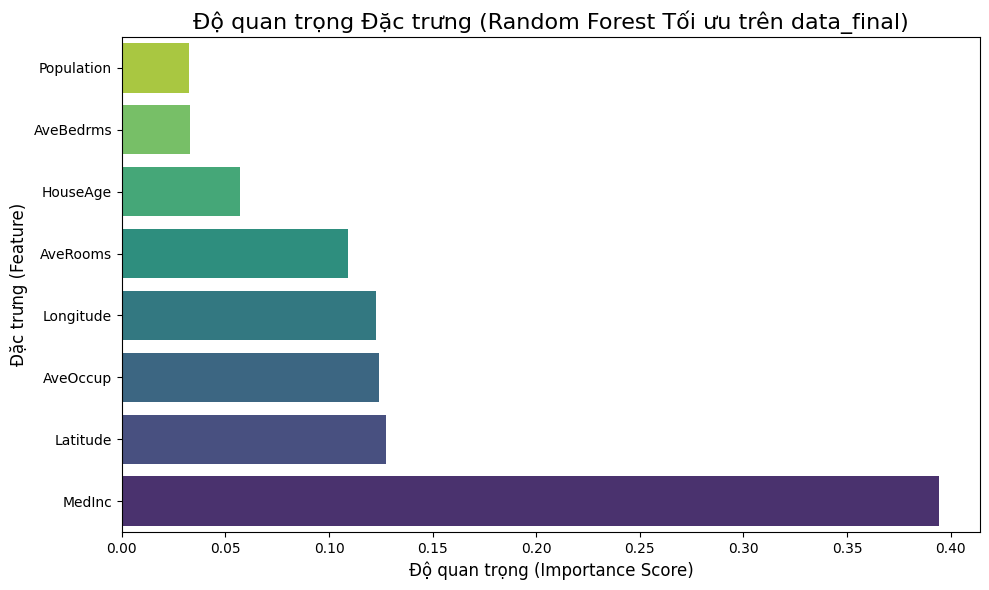

In [ ]:
# --- 4.3 Trích xuất độ quan trọng của các đặc trưng (Random Forest Tối ưu) ---
print("\n--- 4.3 Trích xuất Độ quan trọng Đặc trưng từ RF TỐI ƯU (trên data_final) ---")

# best_rf_model_cleaned: Mô hình Random Forest tốt nhất đã được huấn luyện.
# feature_names_cleaned: Danh sách tên các cột đặc trưng (từ X_cleaned).

# 1. Lấy độ quan trọng từ mô hình đã huấn luyện
importances_rf_cleaned = best_rf_model_cleaned.feature_importances_

# 2. Tạo DataFrame để dễ dàng xử lý và trực quan hóa
# Kết hợp tên đặc trưng và điểm quan trọng tương ứng
feature_importance_df_cleaned = pd.DataFrame({
    'Feature': feature_names_cleaned,
    'Importance': importances_rf_cleaned
})

# 3. Sắp xếp DataFrame theo độ quan trọng giảm dần
feature_importance_df_cleaned = feature_importance_df_cleaned.sort_values(
    by='Importance', ascending=False
).reset_index(drop=True) # Reset index sau khi sắp xếp

# 4. In ra bảng độ quan trọng
print("\nBảng độ quan trọng của các đặc trưng (sắp xếp giảm dần):")
# Sử dụng to_string() để hiển thị đầy đủ nếu có nhiều features
print(feature_importance_df_cleaned.to_string())

# 5. Trực quan hóa bằng biểu đồ cột ngang
print("\nĐang tạo biểu đồ độ quan trọng đặc trưng...")
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df_cleaned,
    palette='viridis'
)
plt.title('Độ quan trọng Đặc trưng (Random Forest Tối ưu trên data_final)', fontsize=16)
plt.xlabel('Độ quan trọng (Importance Score)', fontsize=12)
plt.ylabel('Đặc trưng (Feature)', fontsize=12)
plt.gca().invert_yaxis() # Để đặc trưng quan trọng nhất ở dưới cùng
plt.tight_layout()
plt.show()


**<h2> Nhận xét độ quan trọng đặc trưng (Random Forest tối ưu):**

**1. MedInc (Thu nhập trung bình) là yếu tố Chi phối tuyệt đối:**
* Với điểm quan trọng **~0.394**, MedInc rõ ràng là đặc trưng **quan trọng nhất** trong việc dự đoán giá nhà, theo mô hình Random Forest này. Nó đóng góp gần 40% vào tổng độ quan trọng, cao hơn hẳn tất cả các đặc trưng còn lại cộng lại.
* Điều này hoàn toàn phù hợp với thực tế và các phân tích trước đó: Thu nhập của khu vực là yếu tố dự báo mạnh mẽ nhất cho giá trị bất động sản.

**2. Nhóm đặc trưng quan trọng thứ cấp:**
* Có một nhóm các đặc trưng với độ quan trọng đáng kể, xếp sau MedInc, bao gồm:
  * Latitude (Vĩ độ): ~0.127
  * AveOccup (Số người ở trung bình): ~0.124
  * Longitude (Kinh độ): ~0.123
  * AveRooms (Số phòng trung bình): ~0.109
* Nhóm này cho thấy **vị trí địa lý** (Vĩ độ, Kinh độ) và các yếu tố liên quan đến **cấu trúc/mật độ sử dụng nhà ở** (Số người ở TB, Số phòng TB) đóng vai trò quan trọng thứ hai sau thu nhập. Mô hình đã học được rằng giá nhà thay đổi đáng kể theo vùng (thể hiện qua tọa độ) và quy mô/cách sử dụng nhà trung bình trong khu vực đó.

**3. Nhóm đặc trưng ít quan trọng hơn:**

Các đặc trưng còn lại có độ quan trọng thấp hơn hẳn:
* HouseAge (Tuổi nhà trung bình): ~0.057
* AveBedrms (Số phòng ngủ trung bình): ~0.033
* Population (Dân số): ~0.032

* Điều này không có nghĩa là chúng hoàn toàn không ảnh hưởng, nhưng so với các yếu tố khác, mô hình Random Forest thấy rằng tuổi nhà, số phòng ngủ trung bình (khác với tổng số phòng), và tổng dân số của khối ít đóng góp hơn vào việc cải thiện độ chính xác dự đoán của nó. Có thể ảnh hưởng của chúng đã phần nào được phản ánh qua các biến khác (ví dụ: AveRooms quan trọng hơn AveBedrms, vị trí có thể liên quan đến tuổi nhà).

**Kết luận:**

Thu nhập trung bình (MedInc) là yếu tố quyết định chính. Tiếp theo là vị trí địa lý và các đặc điểm trung bình về cấu trúc và sử dụng nhà ở. Các yếu tố như tuổi nhà, số phòng ngủ cụ thể, và dân số tổng thể có vẻ ít ảnh hưởng hơn trong mô hình này. Kết quả này củng cố hiểu biết về thị trường bất động sản và cho thấy mô hình đã học được các mối quan hệ có ý nghĩa từ dữ liệu.

## 4.4 So sánh độ chính xác và khả năng tổng quát hóa


Sau khi xây dựng và tối ưu hóa các loại mô hình khác nhau, bước quan trọng tiếp theo là so sánh hiệu suất cuối cùng của chúng để xác định phương pháp hiệu quả nhất cho bài toán dự đoán giá nhà California này. Chúng ta sẽ tập trung vào hai khía cạnh chính:

*   **Độ chính xác (Accuracy):** Mức độ dự đoán của mô hình gần với giá trị thực tế như thế nào, được đo lường chủ yếu bằng R² (mức độ giải thích phương sai), MAE (sai số tuyệt đối trung bình) và RMSE (căn sai số bình phương trung bình) trên **tập kiểm tra (Test Set)**.
*   **Khả năng tổng quát hóa (Generalization Ability):** Mức độ ổn định của mô hình khi áp dụng trên dữ liệu mới, chưa từng thấy. Điều này được đánh giá bằng cách so sánh hiệu suất trên **Cross-Validation (CV)** (hoặc OOB score) với hiệu suất trên **Test Set**. Sự khác biệt nhỏ cho thấy mô hình tổng quát hóa tốt và ít bị overfitting.

**Bảng tổng hợp kết quả các mô hình tốt nhất:**
<center>
<style>
  table { border-collapse: collapse; margin: auto; }
  th, td {
    border: 1px solid #ccc;
    padding: 8px;
    text-align: center;
    /* Tăng kích thước chữ trong bảng */
    font-size: 16px; /* Bạn có thể thay đổi giá trị này, ví dụ: 16px, 11pt, large */
  }
  th { background-color: #f2f2f2; font-weight: bold; } /* In đậm chữ trong header */
</style>
<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>R² (Test)</th>
      <th>MAE (Test)</th>
      <th>RMSE (Test)</th>
      <th>Best CV R² / Mean</th>
      <th>Chênh lệch (CV - Test R²)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Linear Regression (Best, with FE)</td>
      <td>0.6713</td>
      <td>0.4877</td>
      <td>0.6563</td>
      <td>0.6838</td>
      <td>+0.0125</td>
    </tr>
    <tr>
      <td>Random Forest (Optimized, Cleaned)</td>
      <td>0.8101</td>
      <td>0.3286</td>
      <td>0.4988</td>
      <td>0.8121</td>
      <td>+0.0020</td>
    </tr>
    <tr>
      <td>XGBoost (Optimized, Cleaned)</td>
      <td><b>0.8456</b></td>
      <td><b>0.2956</b></td>
      <td><b>0.4498</b></td>
      <td>0.8405</td>
      <td>-0.0051</td>
    </tr>
  </tbody>
</table>
</center>

**Phân tích:**

1.  **Độ chính xác trên dữ liệu mới (Test Set):**
    *   **XGBoost Tối ưu** rõ ràng là mô hình có độ chính xác cao nhất, đạt **R² = 0.8456**. Nó giải thích được gần 85% sự biến động của giá nhà và có MAE (\~$29,560), RMSE (~$44,980) thấp nhất.
    *   **Random Forest Tối ưu** đứng thứ hai với **R² = 0.8101**, cũng là một kết quả rất tốt, vượt xa mô hình tuyến tính. MAE (\~$32,860) và RMSE (~$49,880) cũng rất cạnh tranh.
    *   **Linear Regression Tốt nhất** (dù đã có FE) có hiệu suất thấp nhất đáng kể (**R² = 0.6713**) với sai số dự đoán cao hơn nhiều (MAE ~$48,770, RMSE ~$65,630).
    *   *Kết luận về độ chính xác:* Cả hai mô hình phi tuyến tối ưu đều vượt trội hoàn toàn so với mô hình tuyến tính tốt nhất. XGBoost tối ưu mang lại độ chính xác dự đoán cao nhất.

2.  **Khả năng tổng quát hóa (Ổn định):**
    *   **Random Forest Tối ưu:** Chênh lệch giữa R² CV tốt nhất (0.8121) và R² Test (0.8101) là **cực kỳ nhỏ (+0.0020)**. Điều này cho thấy mô hình RF tối ưu rất ổn định và có khả năng tổng quát hóa xuất sắc.
    *   **XGBoost Tối ưu:** Chênh lệch giữa R² CV tốt nhất (0.8405) và R² Test (0.8456) cũng **rất nhỏ (-0.0051)**. Điều này cũng chứng tỏ khả năng tổng quát hóa rất tốt.
    *   **Linear Regression Tốt nhất:** Chênh lệch giữa R² CV trung bình (0.6838) và R² Test (0.6713) là **+0.0125**, cũng là một mức chênh lệch thấp.
    *   *Kết luận về khả năng tổng quát hóa:* Cả ba mô hình cuối cùng đều thể hiện khả năng tổng quát hóa tốt, với các mô hình phi tuyến tối ưu cho thấy sự ổn định đặc biệt cao.

**Kết luận chung về Độ chính xác và Khả năng tổng quát hóa:**

Các mô hình học máy phi tuyến (Random Forest và XGBoost) sau khi được tối ưu hóa không chỉ đạt được **độ chính xác dự đoán vượt trội** so với mô hình hồi quy tuyến tính tốt nhất mà còn thể hiện **khả năng tổng quát hóa xuất sắc**. Trong hai mô hình phi tuyến, **XGBoost tối ưu** nổi bật với hiệu suất tổng thể cao nhất về mọi mặt chỉ số đánh giá trên tập kiểm tra, đồng thời vẫn duy trì sự ổn định tốt.

## 4.5 So sánh mức độ giải thích được của các mô hình

Bên cạnh độ chính xác và khả năng tổng quát hóa, một khía cạnh quan trọng khác khi đánh giá mô hình là **mức độ giải thích được (Interpretability)** - tức là khả năng hiểu được *tại sao* mô hình lại đưa ra một dự đoán cụ thể. Trong nhiều ứng dụng thực tế, việc hiểu được các yếu tố ảnh hưởng đến quyết định của mô hình cũng quan trọng không kém việc dự đoán chính xác.

Chúng ta sẽ so sánh mức độ giải thích được của ba mô hình tốt nhất:

1.  **Linear Regression (Best, with FE):**
    *   **Điểm mạnh:** Đây là mô hình **minh bạch và dễ diễn giải nhất**. Các hệ số hồi quy (coefficients) cho biết (ước tính) mức độ thay đổi của giá nhà khi một đặc trưng thay đổi một đơn vị, *giả sử các yếu tố khác không đổi*. Mặc dù việc diễn giải các biến FE cần cẩn trọng hơn, cấu trúc tuyến tính giúp hiểu được mối quan hệ định lượng (dương/âm, mạnh/yếu) giữa đầu vào và đầu ra, *dựa trên các giả định của mô hình*.
    *   **Điểm yếu:** Sự đơn giản và giả định tuyến tính khiến nó kém chính xác hơn. Hệ số có thể không phản ánh đúng bản chất nếu mối quan hệ thực tế phức tạp, phi tuyến.

2.  **Random Forest (Optimized, Cleaned Data):**
    *   **Điểm mạnh:** Cung cấp **độ quan trọng đặc trưng toàn cục (Global Feature Importance)** rất hữu ích (như đã phân tích). Chúng ta biết được mô hình coi `MedInc`, `Latitude`, `AveOccup`... là các yếu tố ảnh hưởng nhiều nhất đến kết quả *nói chung*.
    *   **Điểm yếu:** Thường được coi là **"hộp đen" (Black Box)** ở cấp độ dự đoán *cục bộ (local)*. Rất khó giải thích tại sao *một dự đoán cụ thể* lại được đưa ra. Cần các kỹ thuật diễn giải nâng cao (như SHAP, LIME) để hiểu các dự đoán riêng lẻ.

3.  **XGBoost (Optimized, Cleaned Data):**
    *   **Điểm mạnh:** Tương tự Random Forest, cũng cung cấp **độ quan trọng đặc trưng toàn cục**. Đạt độ chính xác dự đoán cao nhất.
    *   **Điểm yếu:** Cũng là mô hình **"hộp đen"** cho dự đoán cục bộ. Quá trình boosting có thể làm việc diễn giải phức tạp hơn RF một chút. Việc giải thích dự đoán riêng lẻ cũng đòi hỏi công cụ chuyên dụng.

**Kết luận về Mức độ Giải thích được:**

Có một sự **đánh đổi (trade-off)** rõ ràng giữa độ chính xác và khả năng diễn giải trực tiếp:

*   **Linear Regression:** **Dễ diễn giải nhất** <=> **Kém chính xác nhất**.
*   **Random Forest & XGBoost:** **Chính xác nhất** <=> **Khó diễn giải nhất** (ở cấp độ cục bộ). Chúng cung cấp thông tin **quan trọng đặc trưng tổng thể** có giá trị.

Lựa chọn mô hình cuối cùng cần cân nhắc yêu cầu về khả năng giải thích. Nếu độ chính xác là ưu tiên hàng đầu, XGBoost tối ưu là lựa chọn số một, và Feature Importance cung cấp cái nhìn tổng quan về các yếu tố ảnh hưởng. Nếu việc diễn giải chi tiết từng dự đoán là bắt buộc, Linear Regression (với các hạn chế về độ chính xác) hoặc việc áp dụng các kỹ thuật diễn giải nâng cao cho RF/XGBoost là cần thiết.